# Problem Statement - I



## Introduction

The case study is designed to introduce you to the capabilities of EDA in a financial services environment. It explores how data can be utilized to reduce the risk of loan losses.

Utilizing the EDA techniques and gain hands-on experience with data analysis. Through this study, will be showing how to assess customer attributes and financial variables, which are vital factors when it comes to making informed decisions for financial institutions.


## Business Understanding

Lending companies encounter difficulties when it comes to providing loans to consumers with poor credit histories. Some individuals resort to default on their loans to get around these issues. As an analyst for a financial company that focuses on urban consumer loans, Task is analyzing the data to ensure that the eligible applicants are not rejected. Doing so can minimize the risk of loan defaults.

Due to the difficulties experienced by the financial sector when it comes to granting loans to people with poor credit histories, some consumers resort to default on their applications. As an analyst for a financial firm focused on urban consumer loans, will use the EDA techniques to identify patterns in the collected data. Doing so will help minimize the risk of loan rejections and ensure that the applicants are not rejected.

1.The company must take into account the applicant's profile when making decisions regarding a loan. It has to make decisions based on these two risks.

2.The company might lose its business if the borrower cannot make the required payments on time and the loan is not approved.
Approvals can lead to financial losses if the borrower defaults.



This dataset contains information about loan applications in two different scenarios.

1.Late payments were experienced by some clients, with some of their first Y instalments exceeding the X days mark.

2.The category includes customers who made timely payments.

3.The client or the company has the option to make four initial decisions when a person applies for a loan.

4.The company either approves the loan or rejects it.

5.The client can either change their mind about the loan or get rejected during the approval process. This can be due to a higher risk or due to unfavorable pricing.

5.Cancelled transactions are performed during the approval process when the client withdraws their application, possibly due to a wavering opinion or due to unfavorable market conditions.

6.Rejected: The company refuses to approve the application due to various factors, such as non-compliance.
The loan can be canceled by the client at any stage of the approval process.

The case study you are working on involves using EDA to analyze the data to determine how loan attributes and consumer attributes can affect the likelihood of borrowers default. You will be able to make informed decisions and reduce the risk of financial loss by identifying significant relationships in the data.


## Business Objectives

The study's objective is to identify loan patterns that can help determine the likelihood that a client will have difficulty making their payments. These patterns can then be used to make important decisions, such as reducing the loan amount or offering high-interest loans to riskier applicants. The goal of the project is to ensure that the deserving applicants can still get approved.

The goal of the study is to find the key factors that can help the company identify which drivers are most likely to cause a loan to default. By understanding these variables, the organization can make informed decisions and improve its risk management efforts.

In order to carry out an effective risk analysis, it is recommended that you conduct an independent research campaign. This will allow you to gain deeper understanding of the various variables that affect the risk assessment process. Doing so will allow to make more informed decisions and improve the efficiency of your operations.


# Importing Python Libraries

In [318]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss


In [319]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

# Reading Dataset

## Data Loading and Inspection

In [320]:
# Reading the csv file 'application_data.csv' using 'read_csv'
application_data_df=pd.read_csv("/Users/uttam/Downloads/application_data.csv")
application_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [321]:
application_data_df.tail(4)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[4 rows x 122 columns]

In [322]:
# Checking number of rows and columns of dataframe
application_data_df.shape

(307511, 122)

In [323]:
# Check the info of the dataframe
application_data_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [324]:
application_data_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [325]:
application_data_df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

# Data Cleaning
## Missing Values

In [326]:
# Checking the missing values

application_data_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [327]:
# Checking % of missing values

Percentage_Missingvalue=(application_data_df.isnull().sum()/len(application_data_df)*100).reset_index()
Percentage_Missingvalue

index          0
0                    SK_ID_CURR   0.000000
1                        TARGET   0.000000
2            NAME_CONTRACT_TYPE   0.000000
3                   CODE_GENDER   0.000000
4                  FLAG_OWN_CAR   0.000000
..                          ...        ...
117   AMT_REQ_CREDIT_BUREAU_DAY  13.501631
118  AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
119   AMT_REQ_CREDIT_BUREAU_MON  13.501631
120   AMT_REQ_CREDIT_BUREAU_QRT  13.501631
121  AMT_REQ_CREDIT_BUREAU_YEAR  13.501631

[122 rows x 2 columns]

In [328]:
# # Column from 44 to 90 has > 47% missing values, Droping this column will

application_data_df.drop(columns=(application_data_df.iloc[:, 44:91].columns), inplace=True)

In [329]:
# Checking % of missing values again

application_data_df.isnull().sum()/len(application_data_df)*100


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 75, dtype: float64

In [330]:
# Rechecking the columns number after drping the NA values.
application_data_df.shape 

(307511, 75)

## Handling Missing Values

In [331]:
application_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 75 columns]

In [332]:
#checking each column with Null Value

#AMT_ANNUITY

application_data_df[application_data_df['AMT_ANNUITY'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531      155054       0         Cash loans           M            N   
50035      157917       0         Cash loans           F            N   
51594      159744       0         Cash loans           F            N   
55025      163757       0         Cash loans           F            N   
59934      169487       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531               N             0          180000.0    450000.0   
50035               N             0           94500.0    450000.0   
51594               N             0          202500.0    539100.0   
55025               N             0          162000.0    296280.0   
59934               N             0          202500.0    360000.0   

       AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
47531          NaN  ...                 0                0                0   
50035          NaN  ...                 0                0                0   
51594          NaN  ...                 0                0                0   
55025          NaN  ...                 0                0                0   
59934          NaN  ...                 0                0                0   

      FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
47531                0                        0.0                       0.0   
50035                0                        0.0                       0.0   
51594                0                        0.0                       0.0   
55025                0                        0.0                       0.0   
59934                0                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
47531                         0.0                        0.0   
50035                         0.0                        1.0   
51594                         0.0                        1.0   
55025                         0.0                        1.0   
59934                         1.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
47531                        1.0                         1.0  
50035                        0.0                         1.0  
51594                        0.0                         1.0  
55025                        0.0                         4.0  
59934                        0.0                         6.0  

[5 rows x 75 columns]

**Note**

Missing value can be filled with approx value , Average Percent * Amt_credit avgpercent=app_df.AMT_ANNUITY.mean()/app_df.AMT_CREDIT.mean()

Hence,Not performing imputations as mentioned in the case study.

In [333]:
#checking 'AMT_GOODS_PRICE'

application_data_df[application_data_df['AMT_GOODS_PRICE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
724   ...                 0                0                0   
5937  ...                 0                0                0   
6425  ...                 0                0                0   
6703  ...                 0                0                0   
7647  ...                 0                0                0   

     FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
724                 0                        NaN                       NaN   
5937                0                        0.0                       0.0   
6425                0                        NaN                       NaN   
6703                0                        0.0                       0.0   
7647                0                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
724                          NaN                        NaN   
5937                         0.0                        0.0   
6425                         NaN                        NaN   
6703                         0.0                        0.0   
7647                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
724                         NaN                         NaN  
5937                        0.0                         2.0  
6425                        NaN                         NaN  
6703                        0.0                         0.0  
7647                        0.0                         3.0  

[5 rows x 75 columns]

**Notes**

All rows with AMT_GOODS_PRICE NaN is for NAME_CONTRACT_TYPE - "Revolving Lons"
Revolving loans are GENERALLY not for purchasing any partifuclar item. Hence these values are NaN Can be convereted to 0.

This code can be used:

app_df['AMT_GOODS_PRICE'].fillna(value=0, inplace=True)

In [334]:
#checking 'NAME_TYPE_SUITE'

application_data_df[application_data_df['NAME_TYPE_SUITE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64        100076       0         Cash loans           M            Y   
724       100837       0    Revolving loans           F            N   
1199      101414       0         Cash loans           M            Y   
1669      101954       0         Cash loans           F            Y   
1862      102183       0         Cash loans           F            Y   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
64                 N             0          180000.0    315000.0       9679.5   
724                Y             2           45000.0    135000.0       6750.0   
1199               N             0          135000.0    533668.5      34636.5   
1669               N             2          153000.0   1162170.0      30654.0   
1862               N             0          121500.0    268659.0      13774.5   

      ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
64    ...                 0                0                0   
724   ...                 0                0                0   
1199  ...                 0                0                0   
1669  ...                 0                0                0   
1862  ...                 0                0                0   

     FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
64                  0                        0.0                       0.0   
724                 0                        NaN                       NaN   
1199                0                        0.0                       0.0   
1669                0                        0.0                       0.0   
1862                0                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
64                           0.0                        0.0   
724                          NaN                        NaN   
1199                         0.0                        4.0   
1669                         0.0                        0.0   
1862                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
64                          0.0                         0.0  
724                         NaN                         NaN  
1199                        0.0                         0.0  
1669                        0.0                         0.0  
1862                        2.0                         0.0  

[5 rows x 75 columns]

In [335]:
application_data_df['NAME_TYPE_SUITE'].value_counts(dropna=False)

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: count, dtype: int64

**Notes**

Null value can be filled by using mode()

we Can use below code:

app_df['NAME_TYPE_SUITE'].fillna(value=(app_df['NAME_TYPE_SUITE'].mode()[0]), inplace=True)
app_df['NAME_TYPE_SUITE'].value_counts()

In [336]:
#checking 'OWN_CAR_AGE'
application_data_df[application_data_df['OWN_CAR_AGE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  
5                        1.0                         1.0  

[5 rows x 75 columns]

In [337]:

application_data_df[application_data_df['FLAG_OWN_CAR']=='N'][['FLAG_OWN_CAR','OWN_CAR_AGE']].head()

FLAG_OWN_CAR  OWN_CAR_AGE
0            N          NaN
1            N          NaN
3            N          NaN
4            N          NaN
5            N          NaN

In [338]:
#Handling missing values in 'OCCUPATION_TYPE'

#checking 'NAME_INCOME_TYPE' value_counts where 'OCCUPATION_TYPE' has Null value

application_data_df[application_data_df['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: count, dtype: int64

In [339]:
#checking 'OCCUPATION_TYPE' value_counts where 'NAME_INCOME_TYPE'  has value "Pensioner"

application_data_df[application_data_df['NAME_INCOME_TYPE']=='Pensioner']['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Cleaning staff    2
Laborers          1
Medicine staff    1
Sales staff       1
Name: count, dtype: int64

**Note**

The 'OCCUPATION_TYPE' with null values that may not be a mandatory field and not filled by applicant.


In [340]:
#CHECKING 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'.

application_data_df[application_data_df['EXT_SOURCE_1'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
7      100010       0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
7               Y             0          360000.0   1530000.0      42075.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
7  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
7                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
7                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  
5                        1.0                         1.0  
7                        0.0                         0.0  

[5 rows x 75 columns]

In [341]:
np.round(application_data_df['EXT_SOURCE_1'].describe(),3)

count    134133.000
mean          0.502
std           0.211
min           0.015
25%           0.334
50%           0.506
75%           0.675
max           0.963
Name: EXT_SOURCE_1, dtype: float64

In [342]:
# Droping the 'EXT_SOURCE_1'Columns since percentage of null value is high.
application_data_df.drop(columns=['EXT_SOURCE_1'], inplace = True)
application_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 74 columns]

In [343]:
application_data_df[application_data_df['EXT_SOURCE_2'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
329       100377       0         Cash loans           M            N   
349       100402       0         Cash loans           F            N   
617       100706       0         Cash loans           F            N   
1028      101189       0         Cash loans           F            Y   
1520      101787       0         Cash loans           M            Y   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
329                N             2          157500.0    239850.0      25447.5   
349                Y             0           81000.0    276277.5      21825.0   
617                Y             0          180000.0    533668.5      22738.5   
1028               Y             0          121500.0    909000.0      36180.0   
1520               Y             0          225000.0    269550.0      21294.0   

      ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
329   ...                 0                0                0   
349   ...                 0                0                0   
617   ...                 0                0                0   
1028  ...                 0                0                0   
1520  ...                 0                0                0   

     FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
329                 0                        NaN                       NaN   
349                 0                        NaN                       NaN   
617                 0                        0.0                       0.0   
1028                0                        0.0                       0.0   
1520                0                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
329                          NaN                        NaN   
349                          NaN                        NaN   
617                          0.0                        0.0   
1028                         0.0                        0.0   
1520                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
329                         NaN                         NaN  
349                         NaN                         NaN  
617                         0.0                         2.0  
1028                        0.0                         5.0  
1520                        0.0                         3.0  

[5 rows x 74 columns]

In [344]:
np.round(application_data_df['EXT_SOURCE_2'].describe(),3)

count    306851.000
mean          0.514
std           0.191
min           0.000
25%           0.392
50%           0.566
75%           0.664
max           0.855
Name: EXT_SOURCE_2, dtype: float64

In [345]:
application_data_df[application_data_df['EXT_SOURCE_3'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1       100003       0         Cash loans           F            N   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
9       100012       0    Revolving loans           M            N   
14      100018       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                N             0          270000.0   1293502.5      35698.5   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
9                Y             0          135000.0    405000.0      20250.0   
14               Y             0          189000.0    773680.5      32778.0   

    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
1   ...                 0                0                0                0   
3   ...                 0                0                0                0   
4   ...                 0                0                0                0   
9   ...                 0                0                0                0   
14  ...                 0                0                0                0   

   AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
1                         0.0                       0.0   
3                         NaN                       NaN   
4                         0.0                       0.0   
9                         NaN                       NaN   
14                        NaN                       NaN   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                          0.0                        0.0   
3                          NaN                        NaN   
4                          0.0                        0.0   
9                          NaN                        NaN   
14                         NaN                        NaN   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
1                         0.0                         0.0  
3                         NaN                         NaN  
4                         0.0                         0.0  
9                         NaN                         NaN  
14                        NaN                         NaN  

[5 rows x 74 columns]

In [346]:
np.round(application_data_df['EXT_SOURCE_3'].describe(),3)

count    246546.000
mean          0.511
std           0.195
min           0.001
25%           0.371
50%           0.535
75%           0.669
max           0.896
Name: EXT_SOURCE_3, dtype: float64

In [347]:
application_data_df.drop(columns=['EXT_SOURCE_3'], inplace = True)
application_data_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

**Note**

The columns 66 to 71 of the AMT-REQ-CREDIT-BUREAU indicate that a financial institution or other company may have checked the credit score of an applicant with the Bureau.

The number of places that the applicant is looking for a loan parallely.

The NaN score is an important indicator that the server and the Bureau have failed. 
It can also indicate that the applicant has not been able to get a loan.


In [348]:
application_data_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [349]:
application_data_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [350]:
application_data_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [351]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [352]:
application_data_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [353]:
application_data_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

**Notes**

Based on we can impute all Nan of AMT_REQ_CREDIT_BUREAU, mode() of respective column.
However, not imputing for this case study.

Code below can be used:

for i in app_df.columns:

if i.startswith("AMT_REQ"):

app_df[i].fillna(value=(app_df[i].mode()[0]), inplace=True)
app_df.iloc[:,66:71].isnull().sum()

# Exploratory Data Analysis of Application Data
## Univariate Analysis
### Categorical Nominal

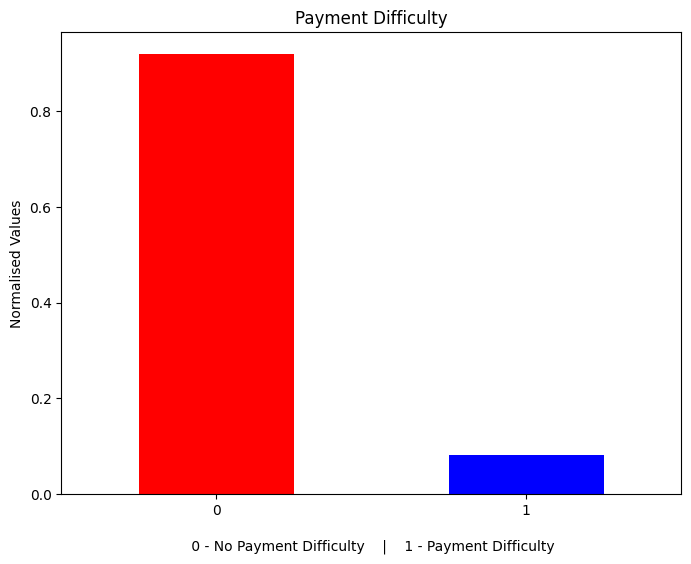

In [354]:
plt.figure(figsize=[8, 6])
application_data_df.TARGET.value_counts(normalize=True).plot.bar(color=colors)
colors=['green','purple']
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - No Payment Difficulty    |    1 - Payment Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values");



In [355]:
#checking exact Target 0 to Target 1 ratio
application_data_df[application_data_df.TARGET==0].shape[0]/application_data_df[application_data_df.TARGET==1].shape[0]

11.387150050352467

**Inference**

1 in every 11 applicant has payment difficulty.

In [356]:
# Checking all columns with object type data

application_data_df.columns[application_data_df.dtypes=="object"].tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


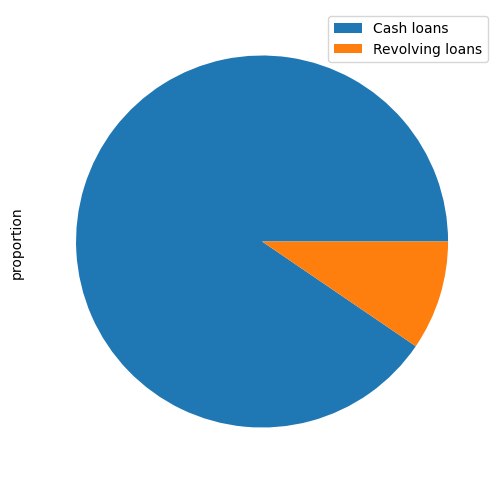

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


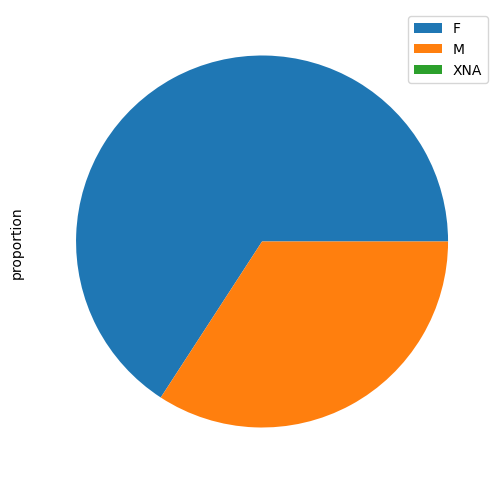

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


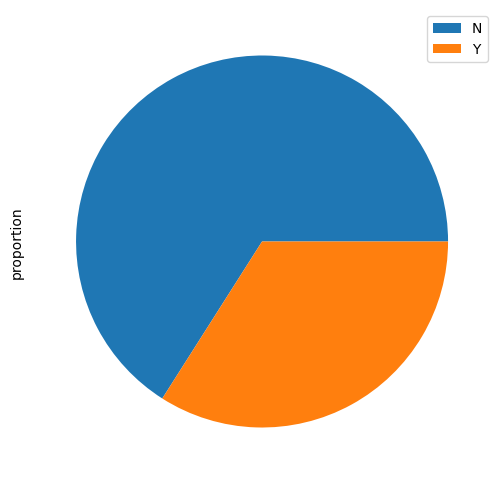

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


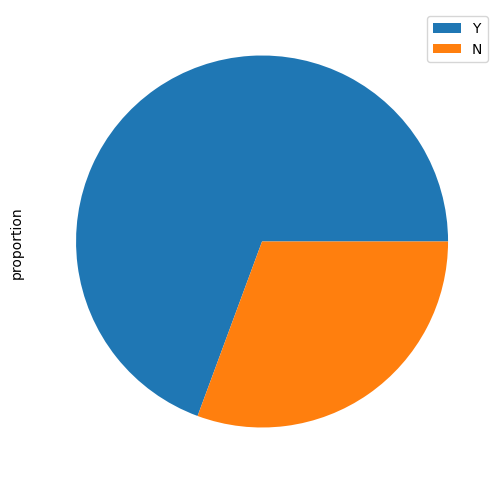

NAME_TYPE_SUITE
Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


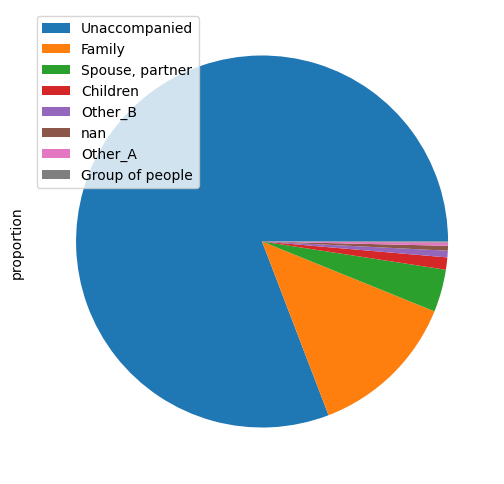

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


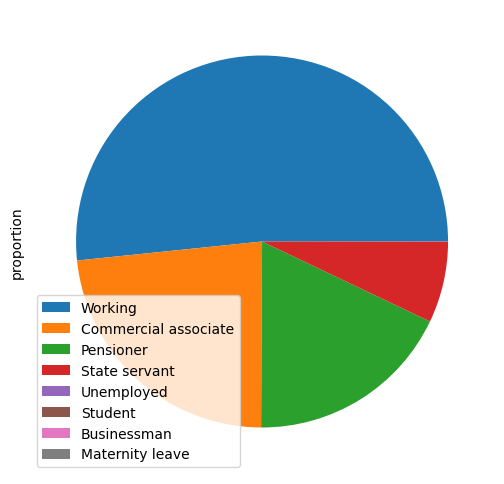

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


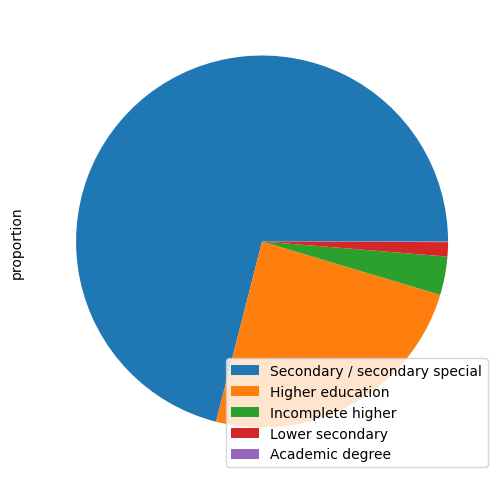

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


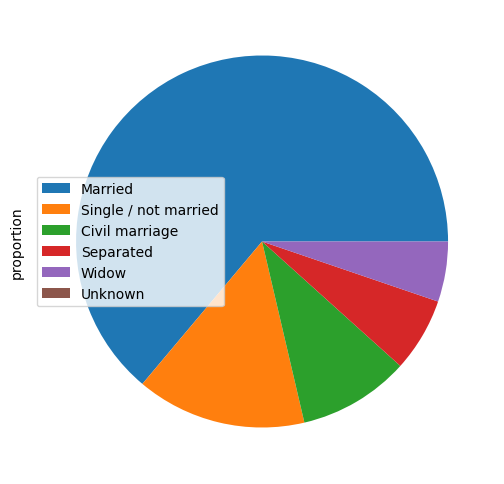

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


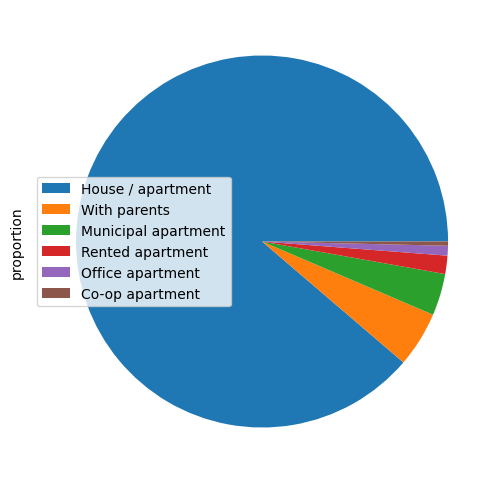

OCCUPATION_TYPE
NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


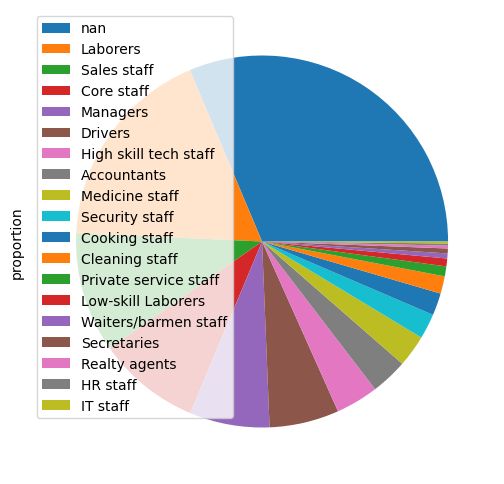

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


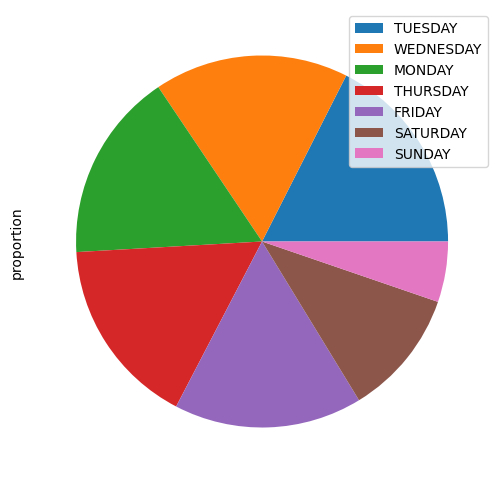

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

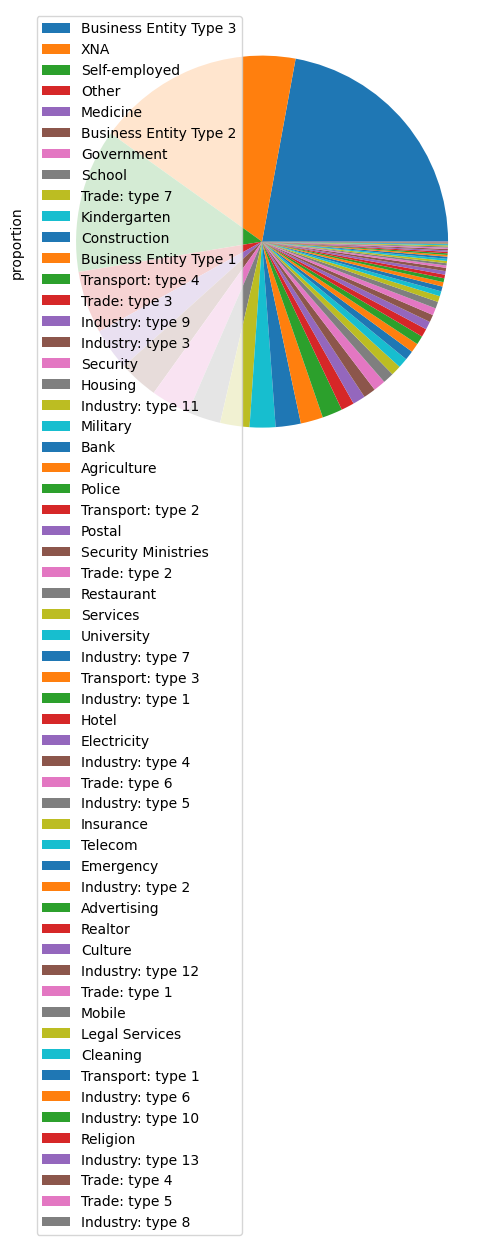

In [357]:
##Checking all object types Variables and their values
for i in application_data_df.columns:
    if application_data_df[i].dtypes=="object":
        print(application_data_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,10])
        application_data_df[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()


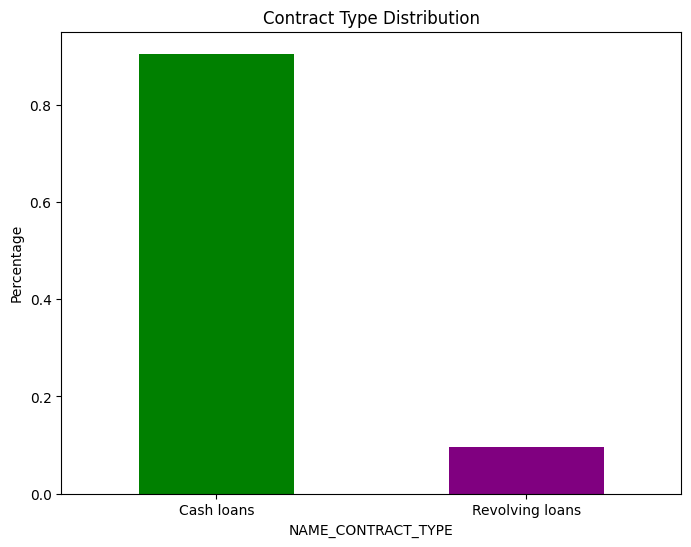

In [358]:
plt.figure(figsize=(8, 6))
colors=['green','purple']
application_data_df['NAME_CONTRACT_TYPE'].value_counts(normalize=True, dropna=False).plot.bar(color=colors, width=0.5)
plt.ylabel("Percentage")
plt.xticks(rotation =360)
plt.title("Contract Type Distribution");

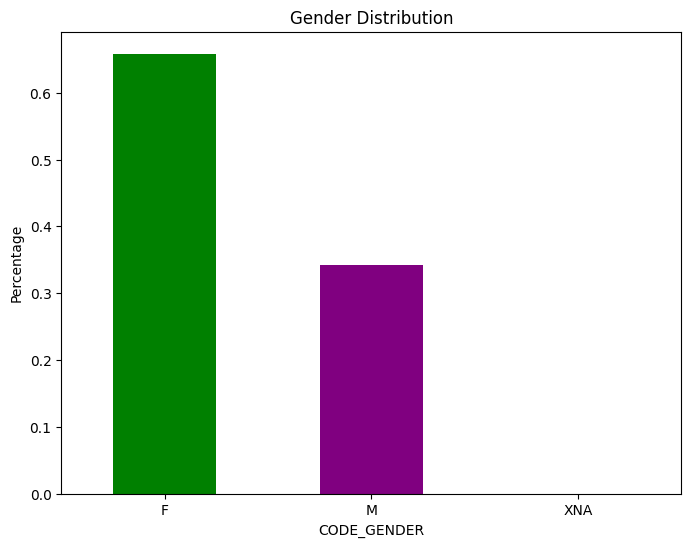

In [359]:
plt.figure(figsize=[8, 6])

# Define custom color for the bar
colors=['green','purple']

# Plot the bar chart with custom color
application_data_df['CODE_GENDER'].value_counts(normalize=True, dropna=False).plot.bar(color=colors, width=0.5)
plt.ylabel("Percentage")
plt.xticks(rotation =360)
plt.title("Gender Distribution");


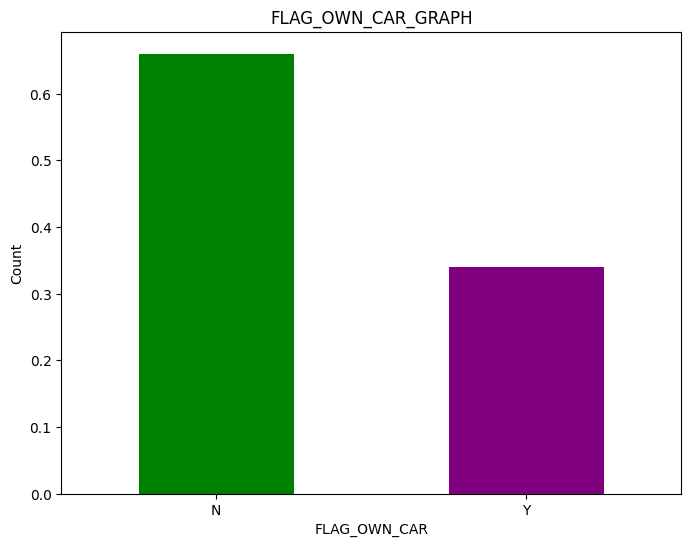

In [360]:
plt.figure(figsize=[8,6])
color = ['green','purple']
application_data_df['FLAG_OWN_CAR'].value_counts(normalize=True, dropna=False).plot.bar(color =color,width = 0.5)
plt.ylabel("Count")
plt.xticks(rotation =0)
plt.title("FLAG_OWN_CAR_GRAPH");

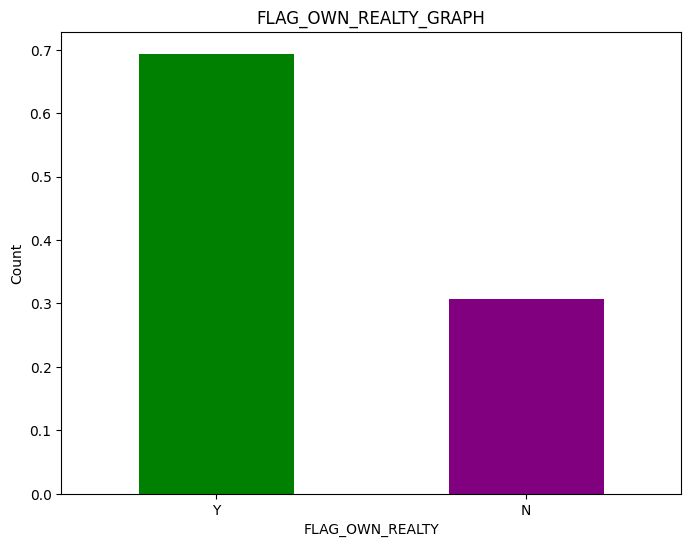

In [361]:
plt.figure(figsize=[8,6])
color = ['green','purple']
application_data_df['FLAG_OWN_REALTY'].value_counts(normalize=True, dropna=False).plot.bar(color =color,width = 0.5)
plt.ylabel("Count")
plt.xticks(rotation =0)
plt.title("FLAG_OWN_REALTY_GRAPH");


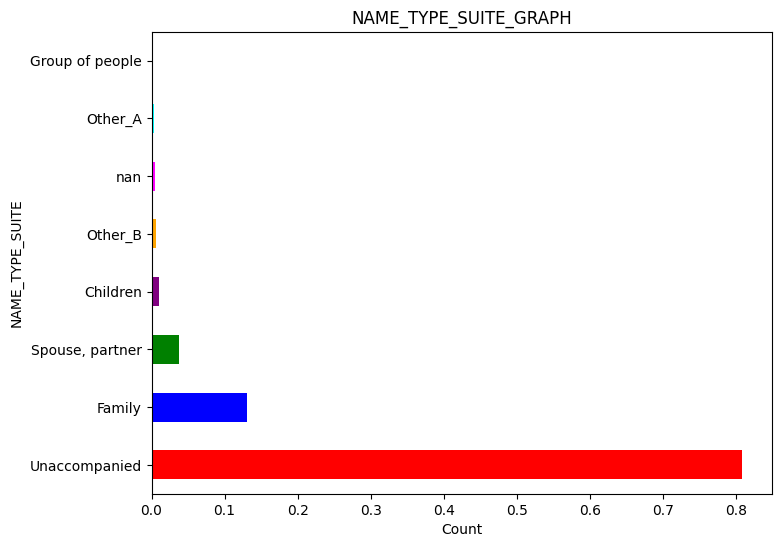

In [362]:
plt.figure(figsize=[8,6])
color = ['red', 'blue', 'green', 'purple','orange','magenta','cyan','yellow']
application_data_df['NAME_TYPE_SUITE'].value_counts(normalize=True, dropna=False).plot.barh(color =color,width = 0.5)
plt.xlabel("Count")
plt.title("NAME_TYPE_SUITE_GRAPH");

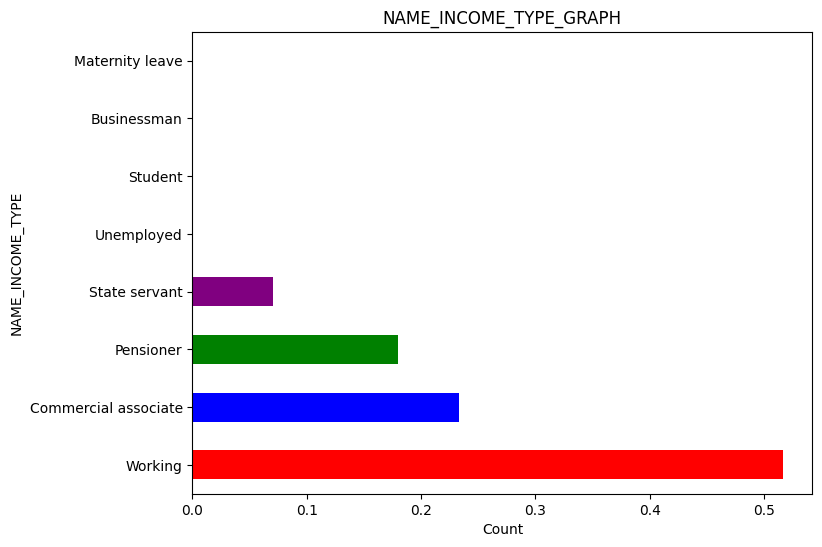

In [363]:
plt.figure(figsize=[8,6])
color = ['red', 'blue', 'green', 'purple','orange','magenta','cyan','yellow']
application_data_df['NAME_INCOME_TYPE'].value_counts(normalize=True, dropna=False).plot.barh(color =color,width = 0.5)
plt.xlabel("Count")
plt.title("NAME_INCOME_TYPE_GRAPH");


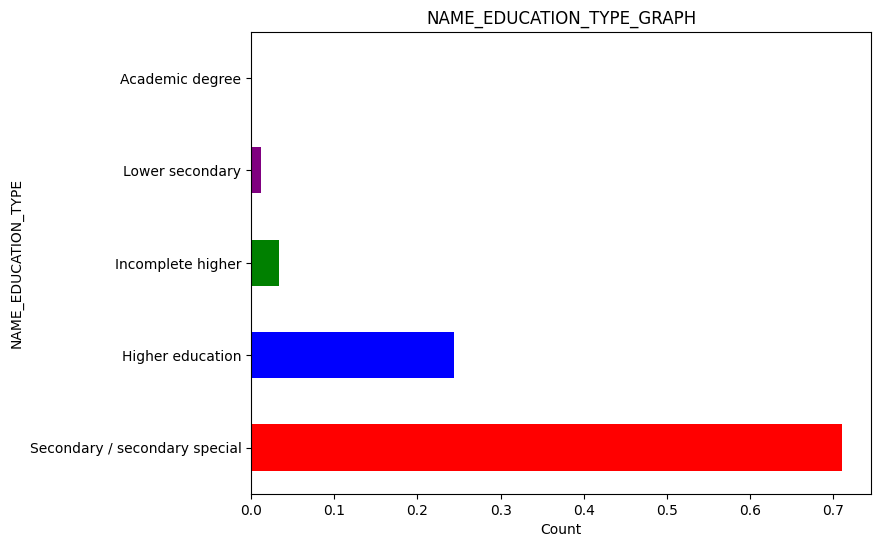

In [364]:
plt.figure(figsize=[8,6])
color = ['red', 'blue', 'green', 'purple','orange']
application_data_df['NAME_EDUCATION_TYPE'].value_counts(normalize=True, dropna=False).plot.barh(color =color,width = 0.5)
plt.xlabel("Count")
plt.title("NAME_EDUCATION_TYPE_GRAPH");


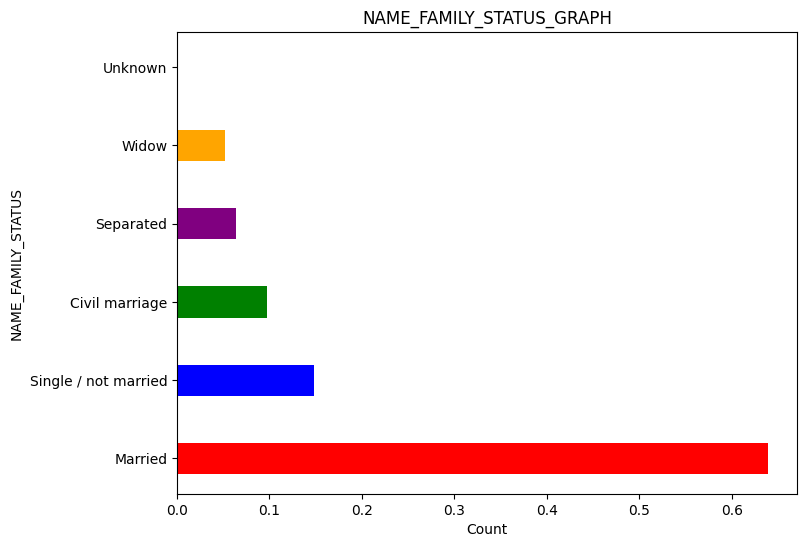

In [365]:
plt.figure(figsize=[8,6])
color = ['red', 'blue', 'green', 'purple','orange']
application_data_df['NAME_FAMILY_STATUS'].value_counts(normalize=True, dropna=False).plot.barh(color =color,width = 0.4)
plt.xlabel("Count")
plt.title("NAME_FAMILY_STATUS_GRAPH");


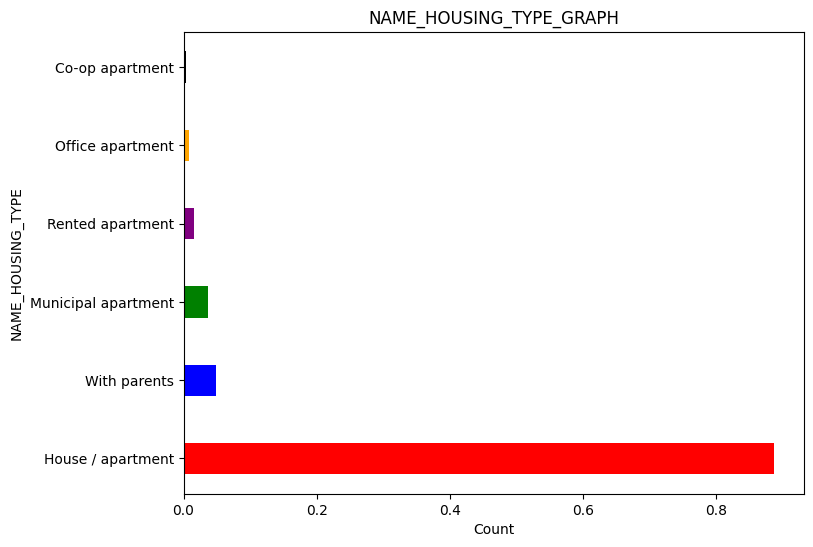

In [366]:
plt.figure(figsize=[8,6])
color = ['red', 'blue', 'green', 'purple','orange','black']
application_data_df['NAME_HOUSING_TYPE'].value_counts(normalize=True, dropna=False).plot.barh(color =color,width = 0.4)
plt.xlabel("Count")
plt.title("NAME_HOUSING_TYPE_GRAPH");


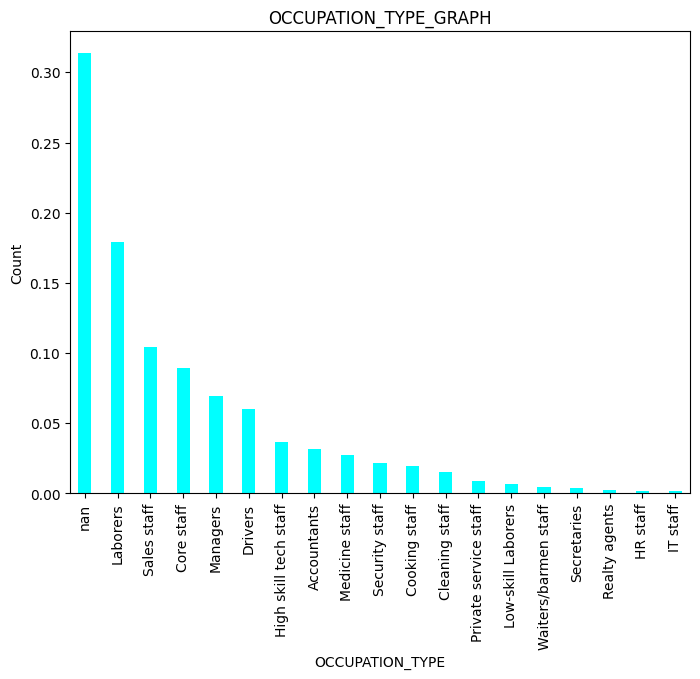

In [367]:
plt.figure(figsize=[8,6])
color = ('cyan')
application_data_df['OCCUPATION_TYPE'].value_counts(normalize=True, dropna=False).plot.bar(color =color,width = 0.4)
plt.ylabel("Count")
plt.title("OCCUPATION_TYPE_GRAPH");


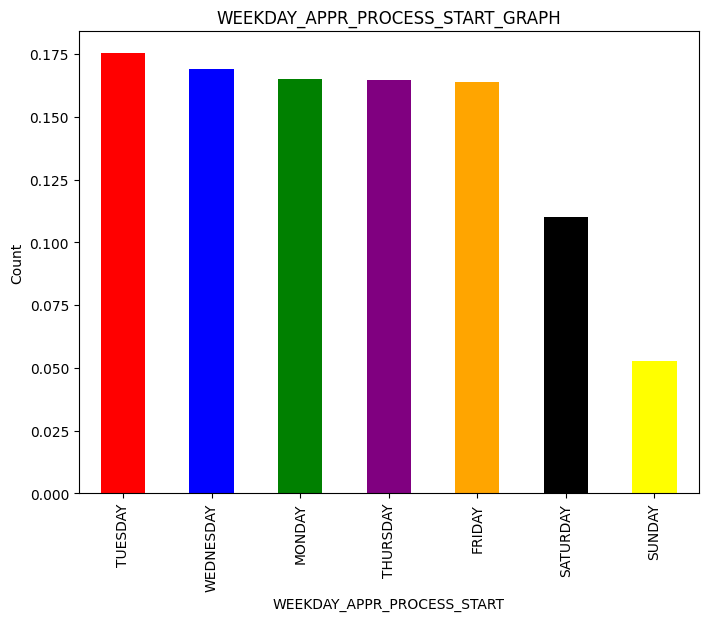

In [368]:
plt.figure(figsize=[8,6])
color = ['red', 'blue', 'green', 'purple','orange','black','yellow']
application_data_df['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True, dropna=False).plot.bar(color =color,width = 0.5)
plt.ylabel("Count")
plt.title("WEEKDAY_APPR_PROCESS_START_GRAPH");

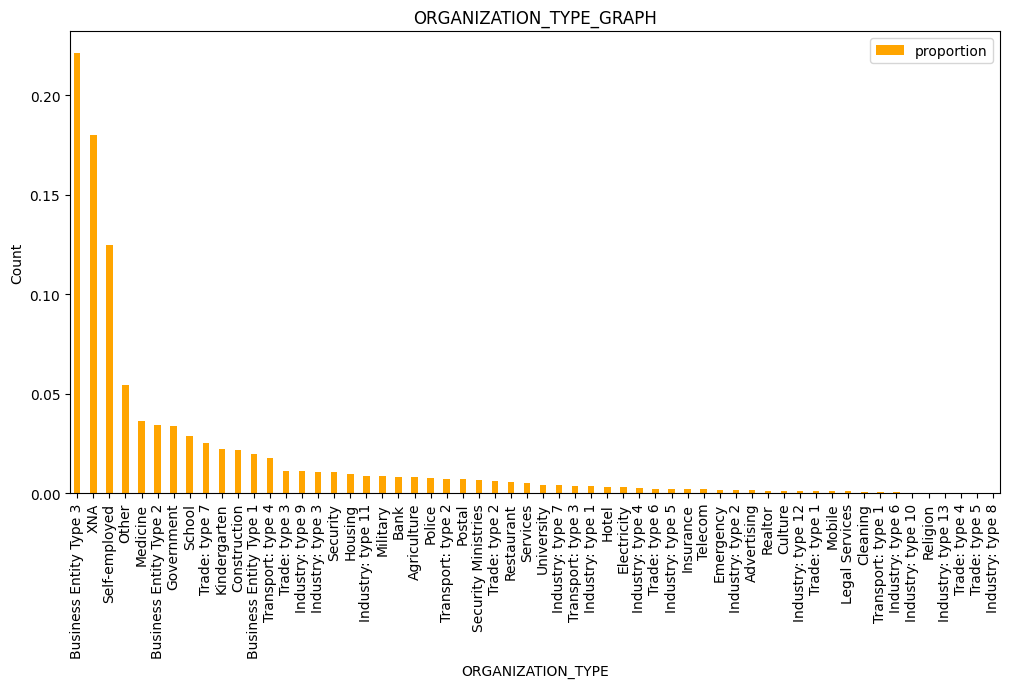

In [369]:
plt.figure(figsize=[12,6])
color = ('orange')
application_data_df['ORGANIZATION_TYPE'].value_counts(normalize=True, dropna=False).plot.bar(color =color,width = 0.4)
plt.ylabel("Count")
plt.title("ORGANIZATION_TYPE_GRAPH")
plt.legend();

**key observations from the data analysis**:

Most of the loans offered are made up of cash loans, while revolving loans make up a small portion.
The percentage of female loan applicants who were approved was 65%, compared to 31% for male applicants. This gender disparity raises questions regarding the underlying reasons.
In addition, over 60% of the applicants don't own a car. This suggests that they prefer public transportation or alternate forms of transportation.
It's also possible that a high percentage of the applicants own properties. 69% of them live in their own homes.
Over 80% of the loan applicants were accompanied by a co-applicant or a qualified guarantor during the application process. This suggests that having these individuals as a co-applicant is important.
Although the majority of the applicants are from the working class, it's interesting that 18% are pensioners. This suggests that their risk profile and financial needs should be taken into account.
The educational attainment of the applicants is also noteworthy, with over 70% of them having completed their secondary education. 

This suggests that the applicant pool is fairly well-educated.
Among the other notable characteristics of the applicants is that 63% are currently married.


### Numerical Variable

In [370]:
application_data_df.columns[application_data_df.dtypes=="int64"].tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [371]:
##Deleting all the Flag columns 

for i in application_data_df.columns:
    if i.startswith("FLAG"):
        application_data_df.drop(columns=i, inplace=True)
        
application_data_df.shape

(307511, 45)

**Standardising**

In [372]:
#DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH cannot be -Ve numbers. Converting to absolute values

In [373]:
#Converting DAYS_BIRTH to positive and converting days to years. Column renamed to AGE_IN_YEARS
application_data_df.DAYS_BIRTH=app_df.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
application_data_df.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)


In [374]:
#DAYS_REGISTRATION, DAYS_ID_PUBLISH to +ve numbers and change to years. Columns Renamed


application_data_df.DAYS_REGISTRATION = application_data_df.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
application_data_df.DAYS_ID_PUBLISH = application_data_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.25))
application_data_df.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, axis=1, inplace=True)

In [375]:
#DAYS_LAST_PHONE_CHANGE to +ve
application_data_df.DAYS_LAST_PHONE_CHANGE = application_data_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [376]:
application_data_df.DAYS_EMPLOYED=application_data_df.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
application_data_df.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

In [377]:
application_data_df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                      2.0                      2.0   
1  ...                      0.0                      1.0   
2  ...                      0.0                      0.0   
3  ...                      0.0                      2.0   
4  ...                      0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                 1134.0                         0.0   
1                      0.0                  828.0                         0.0   
2                      0.0                  815.0                         0.0   
3                      0.0                  617.0                         NaN   
4                      0.0                 1106.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 45 columns]

**Binning**

In [378]:
# Binning AGE and Creating new column "AGE_GROUP"

application_data_df['AGE_GROUP']= pd.cut(application_data_df.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])

application_data_df['AGE_GROUP'].value_counts(normalize=True)

AGE_GROUP
(35, 45]    0.274010
(25, 35]    0.235533
(45, 55]    0.228252
(55, 65]    0.196812
(15, 25]    0.039781
(65, 75]    0.025612
Name: proportion, dtype: float64

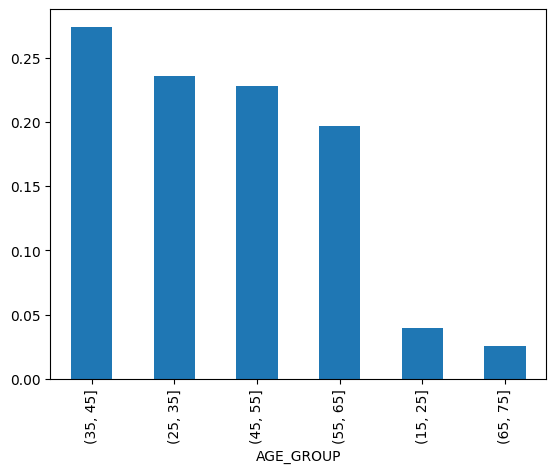

In [379]:
application_data_df['AGE_GROUP'].value_counts(normalize=True).plot.bar();

**35-45 Age group is the largest Group of Age applying for loans. This may be attributed to consumerism aspect at that age**.

In [380]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"

application_data_df['INCOME_GROUP']= pd.qcut(application_data_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

application_data_df['INCOME_GROUP'].value_counts(normalize=True)

INCOME_GROUP
Medium      0.274143
High        0.245562
Low         0.218486
VeryHigh    0.153224
VeryLow     0.108585
Name: proportion, dtype: float64

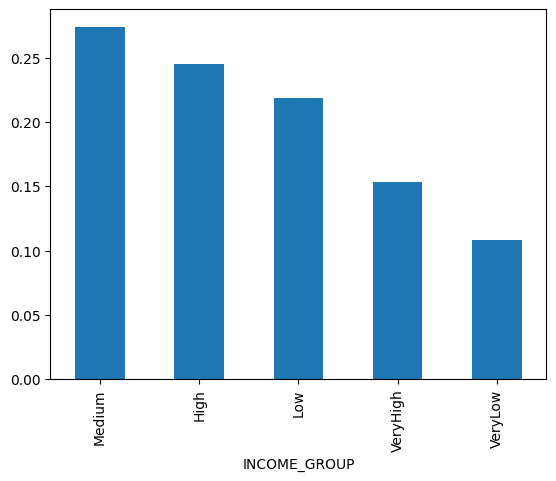

In [381]:
application_data_df['INCOME_GROUP'].value_counts(normalize=True).plot.bar();

 **Medium Income group is the largest Group applying for loans**.

### Integer Data - Analysis by plotting Box plots

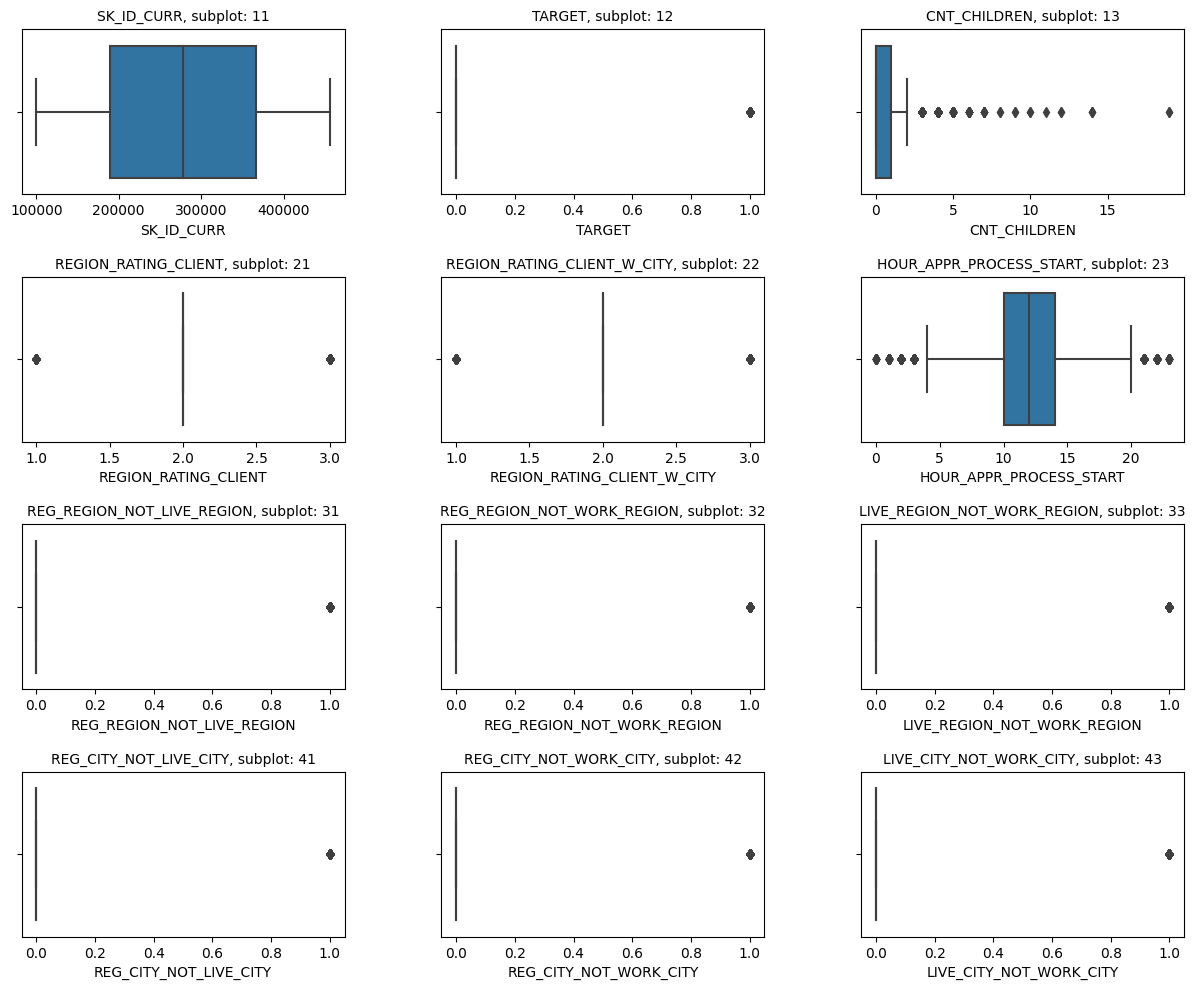

In [382]:

int_columns = application_data_df.select_dtypes(include=['int64', 'int32']).columns

num_plots = len(int_columns)
num_rows = 5
num_cols = 3

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  

# Plot boxplots for each integer column
for idx, column in enumerate(int_columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.boxplot(x=application_data_df[column], ax=ax)
    ax.set_title(f'{column}, subplot: {row+1}{col+1}', fontsize=10)
    ax.set_xlabel(column)

# Remove empty subplots if necessary
if num_plots < num_rows * num_cols:
    for idx in range(num_plots, num_rows * num_cols):
        row = idx // num_cols
        col = idx % num_cols
        fig.delaxes(axes[row, col])

plt.show()


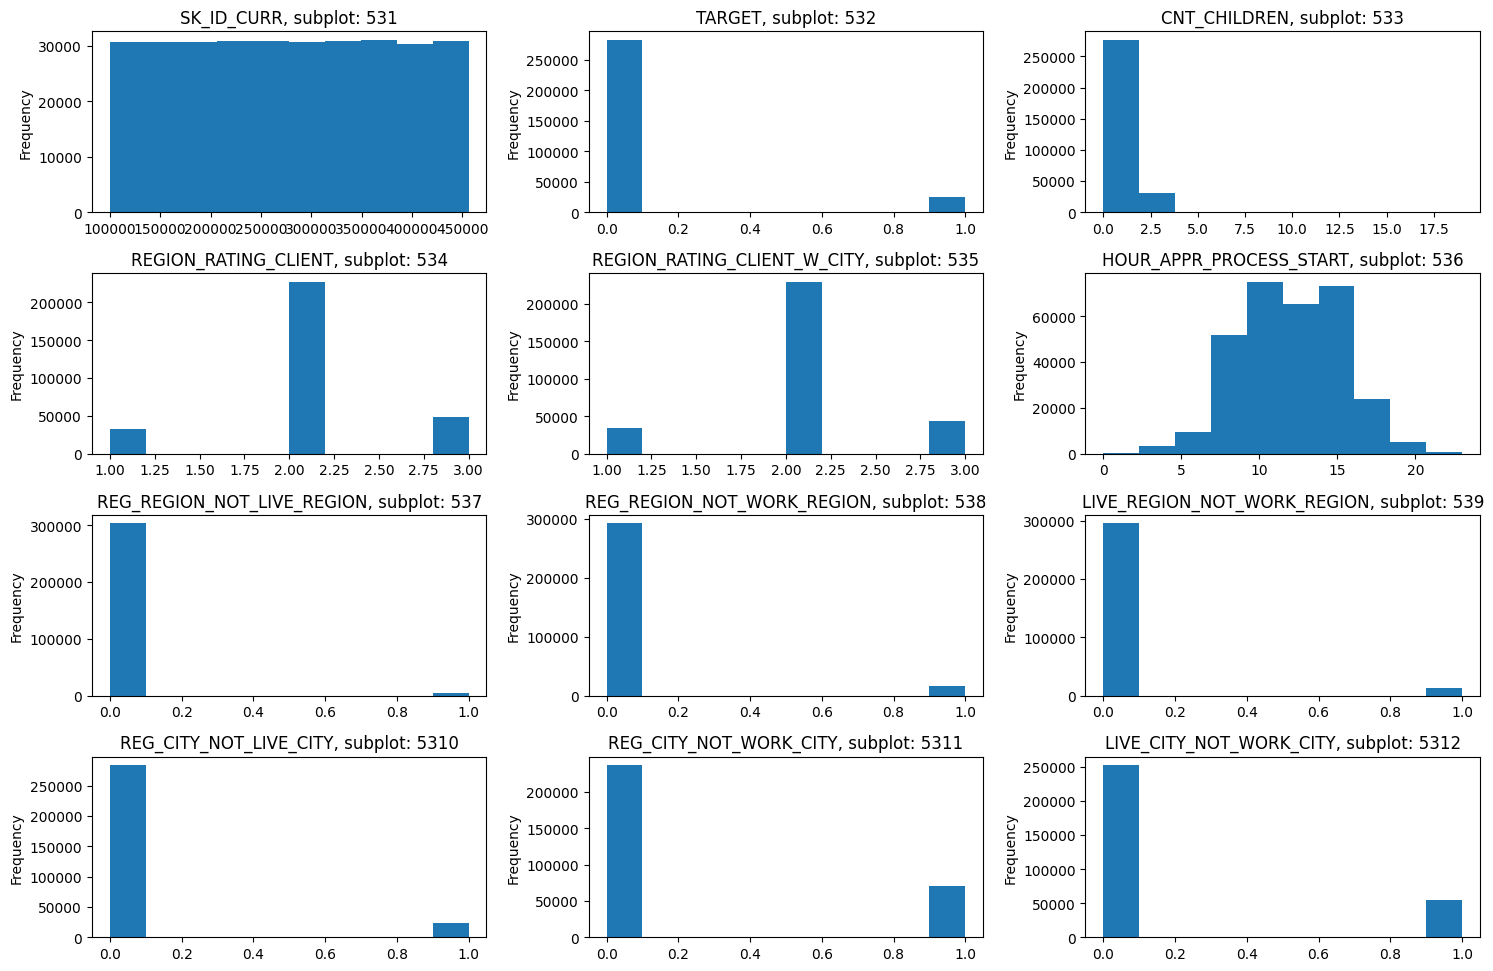

In [383]:
# INT Data - Histogram - Analysis by plotting Histograms

a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in application_data_df.columns:
    if application_data_df[i].dtypes=="int64" or application_data_df[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        app_df[i].plot.hist()
        c = c + 1

fig.tight_layout()
plt.show()

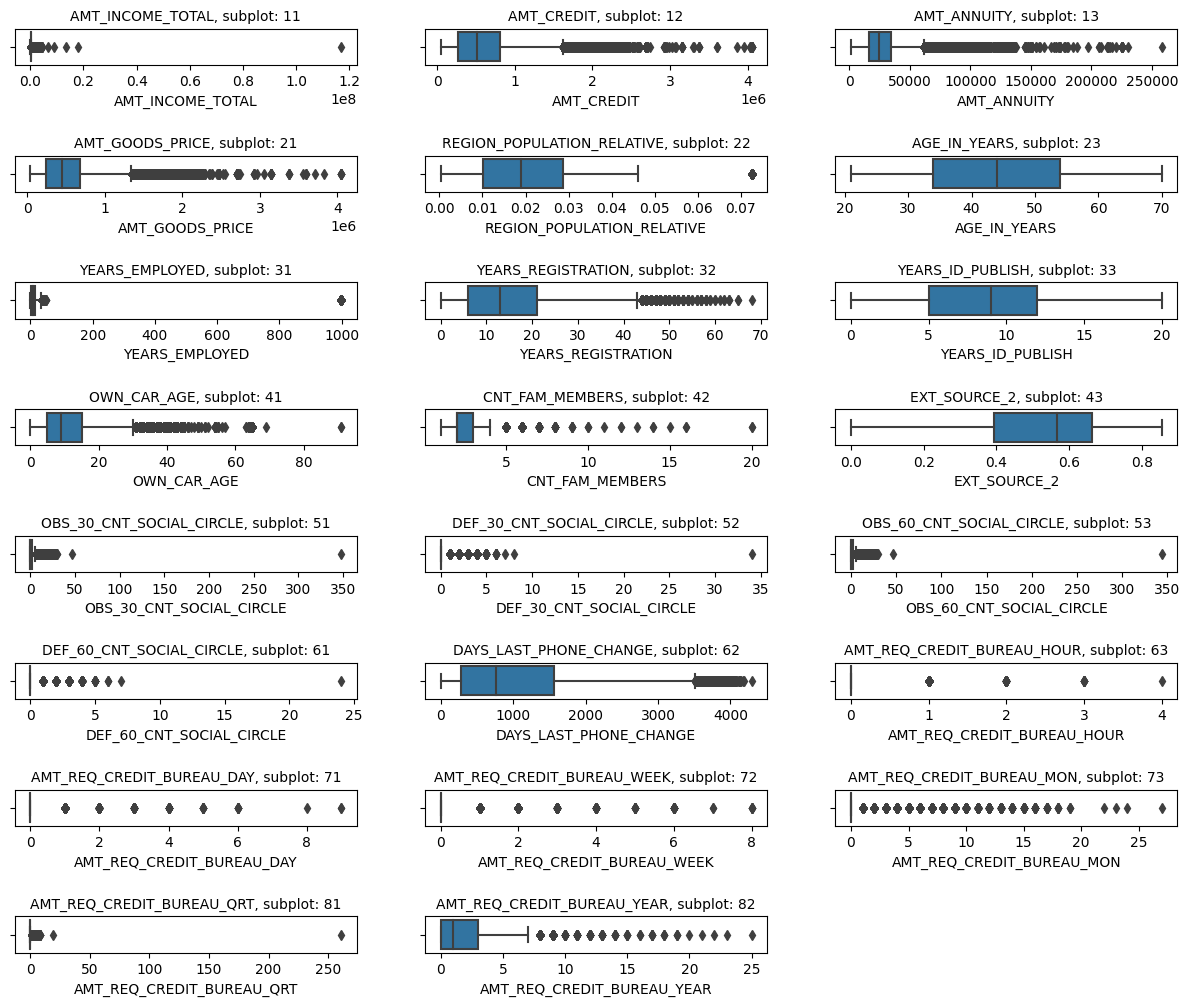

In [384]:

float_columns = application_data_df.select_dtypes(include=['float64', 'float32']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(float_columns)
num_rows = 8
num_cols = 3

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=2.5)  # Adjust the spacing between subplots

# Ploting boxplots for each float column
for idx, column in enumerate(float_columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.boxplot(x=application_data_df[column], ax=ax)  # Swap x and y axes
    ax.set_title(f'{column}, subplot: {row+1}{col+1}', fontsize=10)
    ax.set_xlabel(column)  # Use set_xlabel instead of set_ylabel

# Remove empty subplots if necessary
if num_plots < num_rows * num_cols:
    for idx in range(num_plots, num_rows * num_cols):
        row = idx // num_cols
        col = idx % num_cols
        fig.delaxes(axes[row, col])

plt.show()




**Outlier & Possible Treatment**

In [385]:

#Outliers observed in following columns:
#'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
#'YEARS_EMPLOYED','YEARS_REGISTRATION','OWN_CAR_AGE', DAYS_LAST_PHONE_CHANGE

In [386]:
outlier_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']

for col in outlier_columns:
    print(f"\nColumn: {col}")
    print(application_data_df[col].describe())
    print("\nValue Counts:")
    print(application_data_df[col].value_counts(dropna=False, normalize=True))
    print("\n")



Column: AMT_INCOME_TOTAL
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Value Counts:
AMT_INCOME_TOTAL
135000.0    0.116256
112500.0    0.100871
157500.0    0.086358
180000.0    0.080384
90000.0     0.073113
              ...   
117324.0    0.000003
64584.0     0.000003
142897.5    0.000003
109170.0    0.000003
113062.5    0.000003
Name: proportion, Length: 2548, dtype: float64



Column: AMT_CREDIT
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

Value Counts:
AMT_CREDIT
450000.0     0.031573
675000.0     0.028867
225000.0     0.026542
180000.0     0.023876
270000.0     0.023547
               ...   
487318.5     0.000003
630400.5     0.000003
1875276.0    0.0

**Not performing Outlier Treatment as instructed**.

In [387]:
# Creating list with names of categorical nominal , numerical and categorical oridnal variables. This is being done to make codes lesser repeatitive
object_var=[]
nominal_var=[]
for i in application_data_df.columns:
    if application_data_df[i].dtypes=="object":
        object_var.append(i)
    else:
        nominal_var.append(i)

categorical_var=[]
for i in nominal_var:
    if len(application_data_df[i].unique())<4:
        application_data_df[i].astype("category")
        categorical_var.append(i) 

In [388]:
for i in categorical_var:
    nominal_var.remove(i)

print("Numercial Columns :", nominal_var) 
print("\n")

print("Object Columns :", object_var) 
print("\n")

print("Categorical Columns :", categorical_var) 

Numercial Columns : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'INCOME_GROUP']


Object Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


Categorical Columns : ['TARGET', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'R

In [389]:
# Removing income group and age group as these have binned data. Code_gender and Target are ordinal and hence move to differnt list
nominal_var.remove('INCOME_GROUP')
nominal_var.remove('AGE_GROUP')
nominal_var.remove('SK_ID_CURR')
object_var.remove('CODE_GENDER')

categorical_var.append('CODE_GENDER')

categorical_var.remove('TARGET')

print("Numercial Columns :", nominal_var) 
print("\n")

print("Object Columns :", object_var) 
print("\n")

print("Categorical Columns :", categorical_var) 

Numercial Columns : ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Object Columns : ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


Categorical Columns : ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY

**Deviding datafram into 02 part (Target 1 and Target 0)**.


1.Target variable 1 - Defaulter

2.Target variable 0 - Non Defaulter

In [397]:
Non_Defaulter_df=application_data_df[application_data_df['TARGET']==0]
Non_Defaulter_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   

   NAME_TYPE_SUITE  ... DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
1           Family  ...                      0.0                  828.0   
2    Unaccompanied  ...                      0.0                  815.0   
3    Unaccompanied  ...                      0.0                  617.0   
4    Unaccompanied  ...                      0.0                 1106.0   
5  Spouse, partner  ...                      0.0                 2536.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_GROUP  \
1                        0.0                         0.0   (45, 55]   
2                        0.0                         0.0   (45, 55]   
3                        NaN                         NaN   (45, 55]   
4                        0.0                         0.0   (45, 55]   
5                        1.0                         1.0   (45, 55]   

   INCOME_GROUP  
1      VeryHigh  
2       VeryLow  
3        Medium  
4        Medium  
5           Low  

[5 rows x 47 columns]

In [398]:
Defaulter_df=application_data_df[application_data_df['TARGET']==1]
Defaulter_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
81      100096       1         Cash loans           F             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
81           81000.0    252000.0      14593.5         252000.0   

   NAME_TYPE_SUITE  ... DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
0    Unaccompanied  ...                      2.0                 1134.0   
26   Unaccompanied  ...                      0.0                  161.0   
40   Unaccompanied  ...                      0.0                 1075.0   
42   Unaccompanied  ...                      0.0                 1480.0   
81   Unaccompanied  ...                      1.0                    0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                       0.0   
26                        0.0                       0.0   
40                        0.0                       0.0   
42                        0.0                       0.0   
81                        0.0                       0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        2.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_GROUP  \
0                         0.0                         1.0   (25, 35]   
26                        2.0                         2.0   (45, 55]   
40                        0.0                         4.0   (45, 55]   
42                        0.0                         2.0   (35, 45]   
81                        0.0                         0.0   (65, 75]   

    INCOME_GROUP  
0           High  
26           Low  
40          High  
42        Medium  
81       VeryLow  

[5 rows x 47 columns]

## Categorical Nominal to analyse both data frames

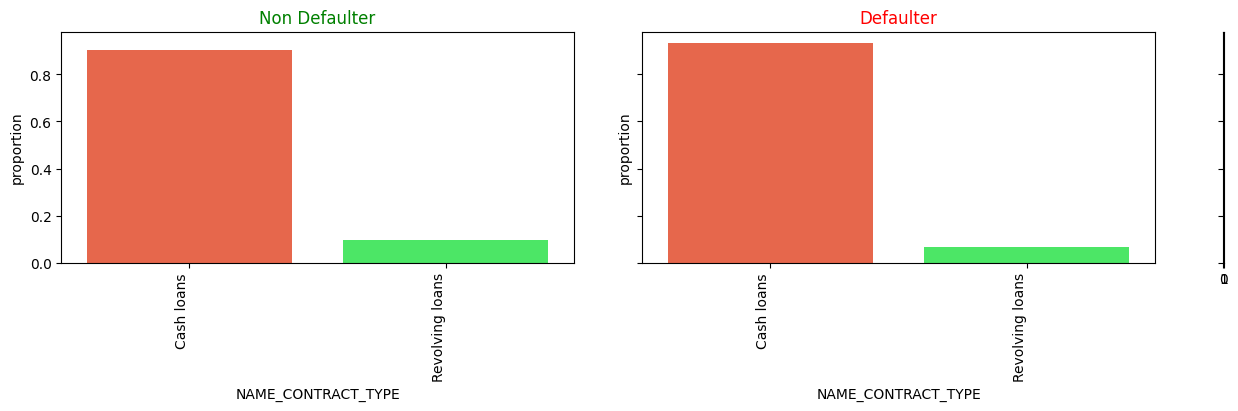

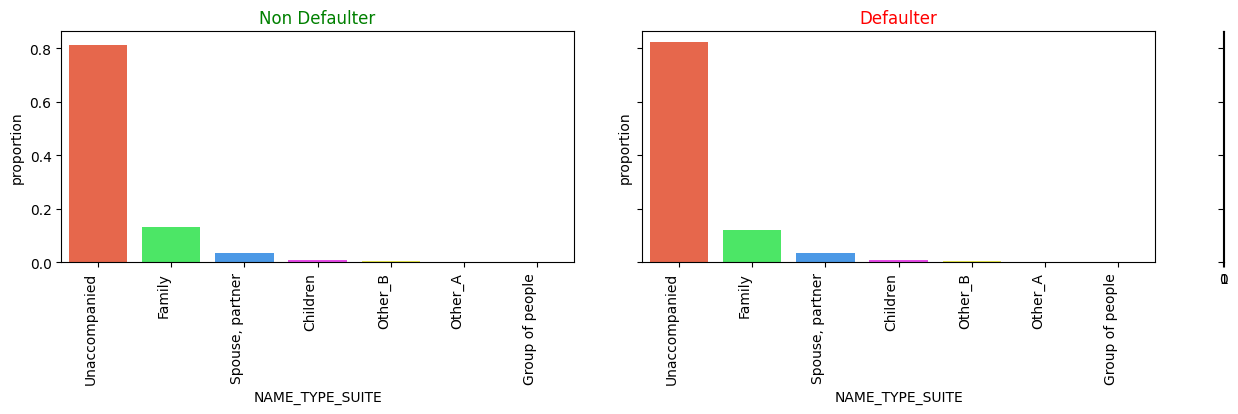

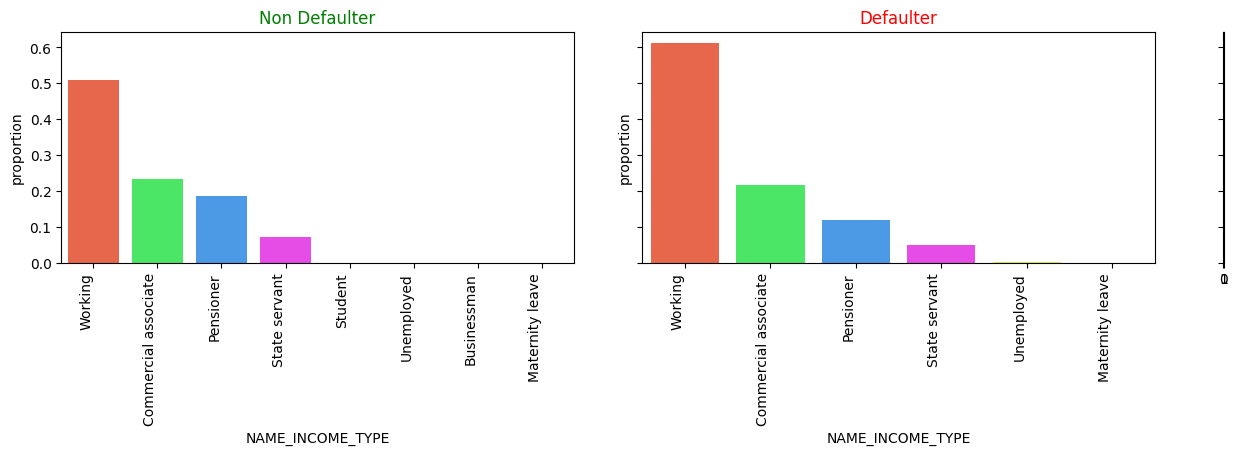

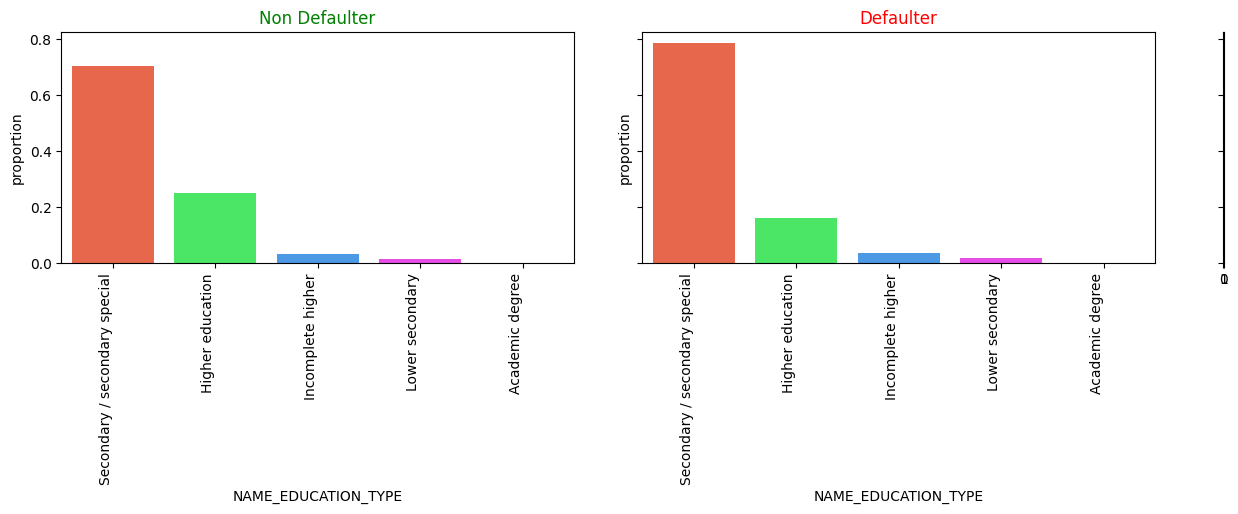

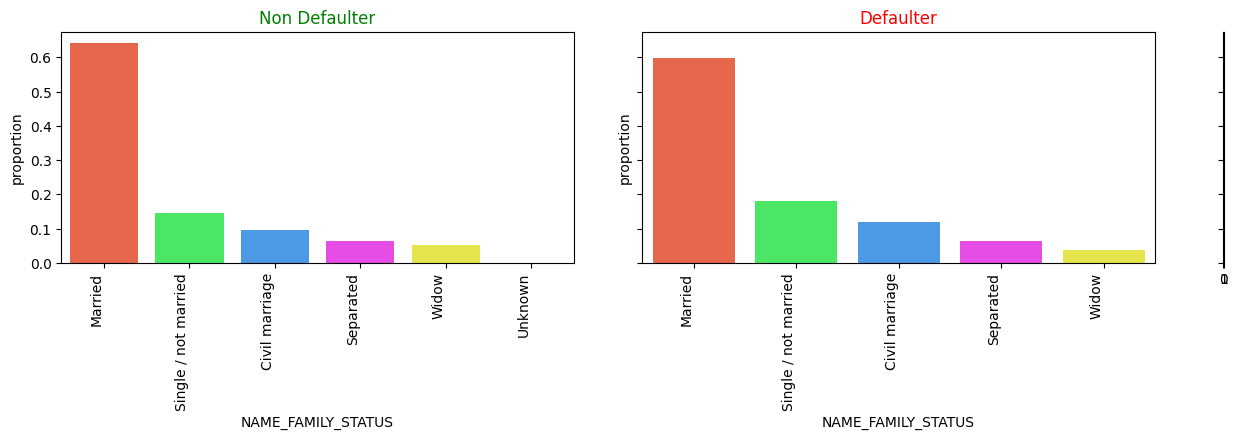

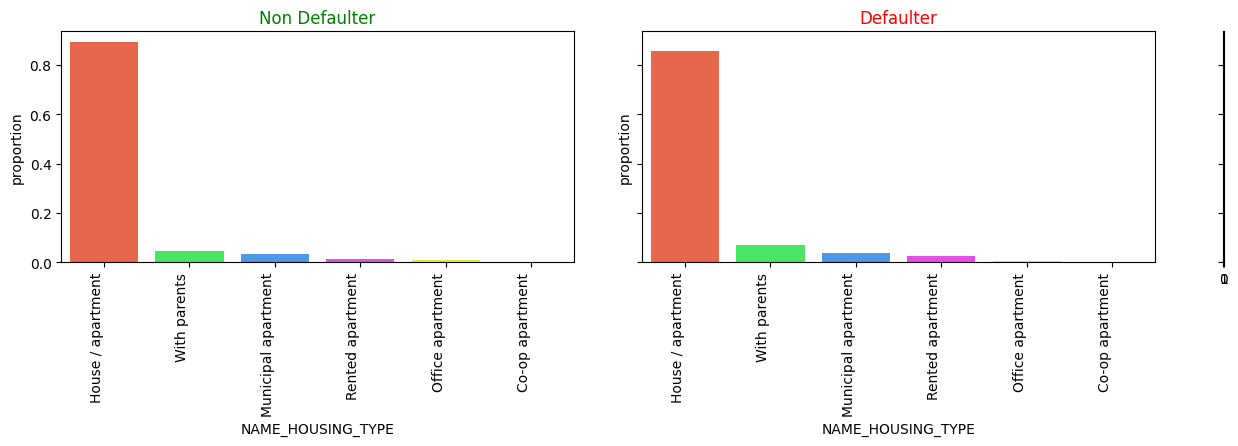

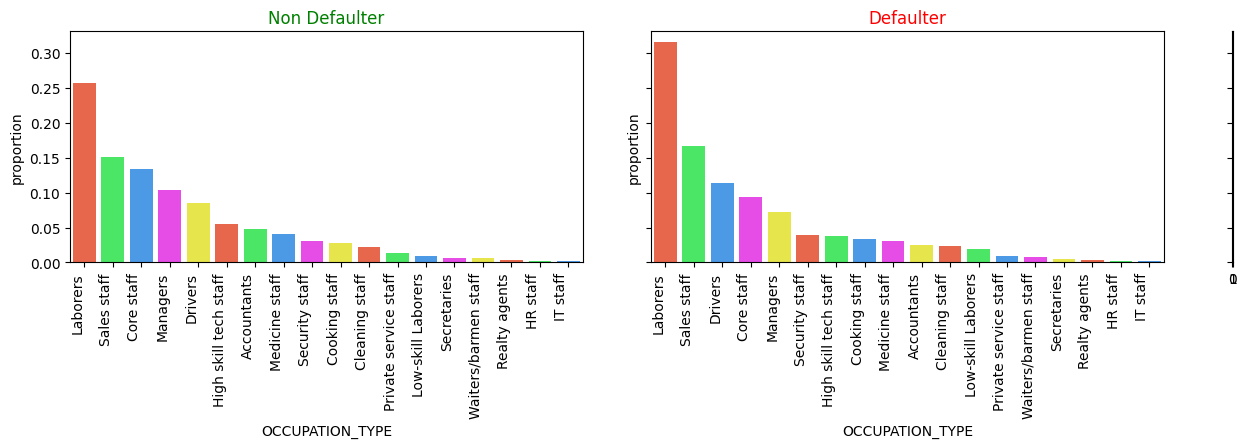

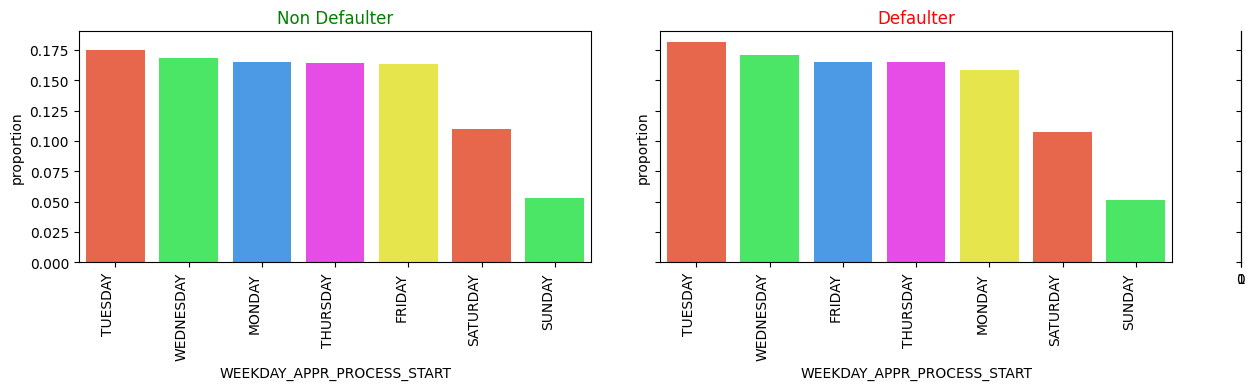

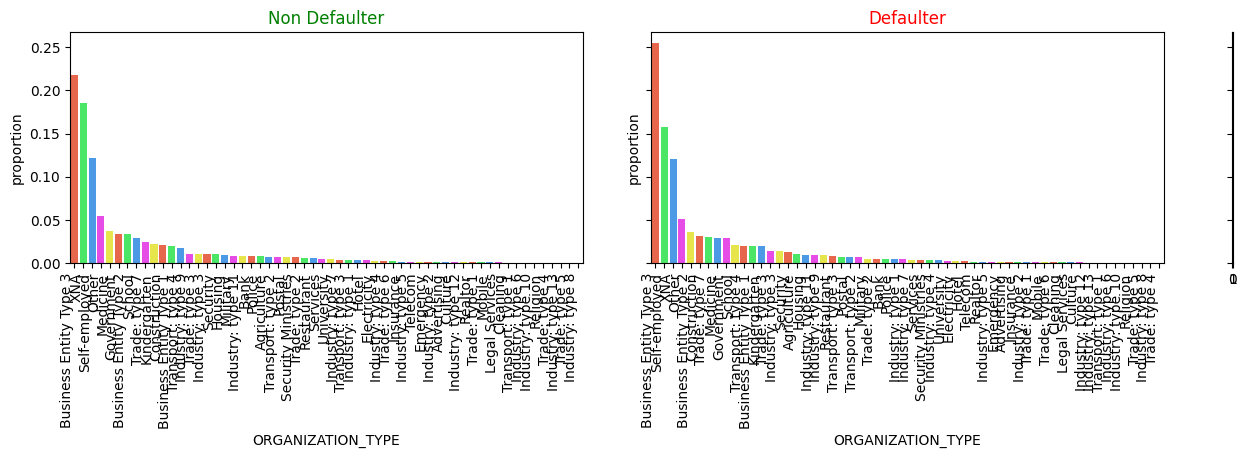

In [403]:

# Define custom colors for the bar charts
colors = ['#FF5733', '#33FF55', '#3399FF', '#FF33FF', '#FFFF33']

for i in object_var:
    cat_num_0 = Non_Defaulter_df[i].value_counts(normalize=True)
    cat_num_1 = Defaulter_df[i].value_counts(normalize=True)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, gridspec_kw={'width_ratios': [1, 1, 0.001]}, figsize=(15, 3))
    
    # Plotting the bar charts for Target 0 and Target 1 with custom colors
    chart1 = sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette=colors)
    chart2 = sns.barplot(x=cat_num_1.index, y=cat_num_1, ax=ax2, palette=colors)

    # Customizing the appearance of the bar charts
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Non Defaulter', fontsize=12, fontweight=7, color='Green')
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Defaulter', fontsize=12, fontweight=7, color='red')

## Continuous Variables

Graph for :  AGE_GROUP
Graph for :  INCOME_GROUP


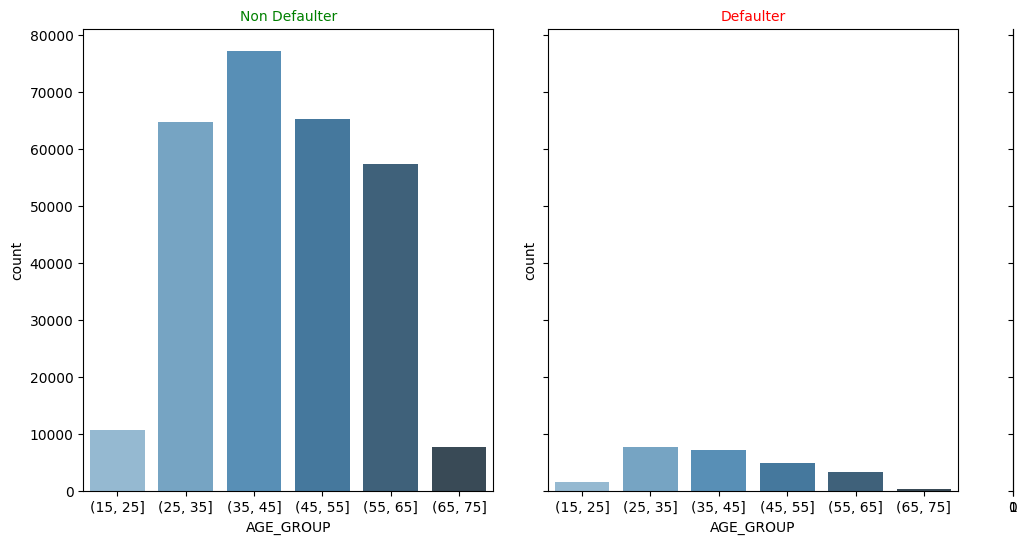

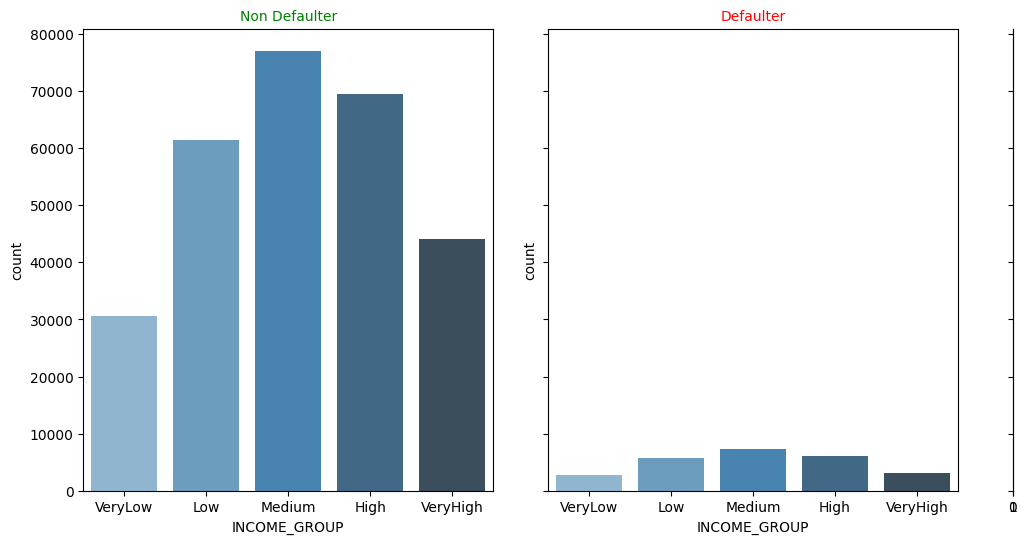

In [402]:
#Plotting Age_Group and Income_Group 

binList=["AGE_GROUP", "INCOME_GROUP"]
for i in binList:

    cat_num_0=Non_Defaulter_df [i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print("Graph for : ",i)
    
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='center')
    chart1.axes.set_title('Non Defaulter',fontsize= 10,fontweight= 7,color='green')
    
    cat_num_1=Defaulter_df [i].value_counts()
    
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='center')
    chart2.axes.set_title('Defaulter',fontsize= 10,fontweight= 7,color='red');
    
    
    

## Bivariate Analysis on Categorical and Continuous Variable

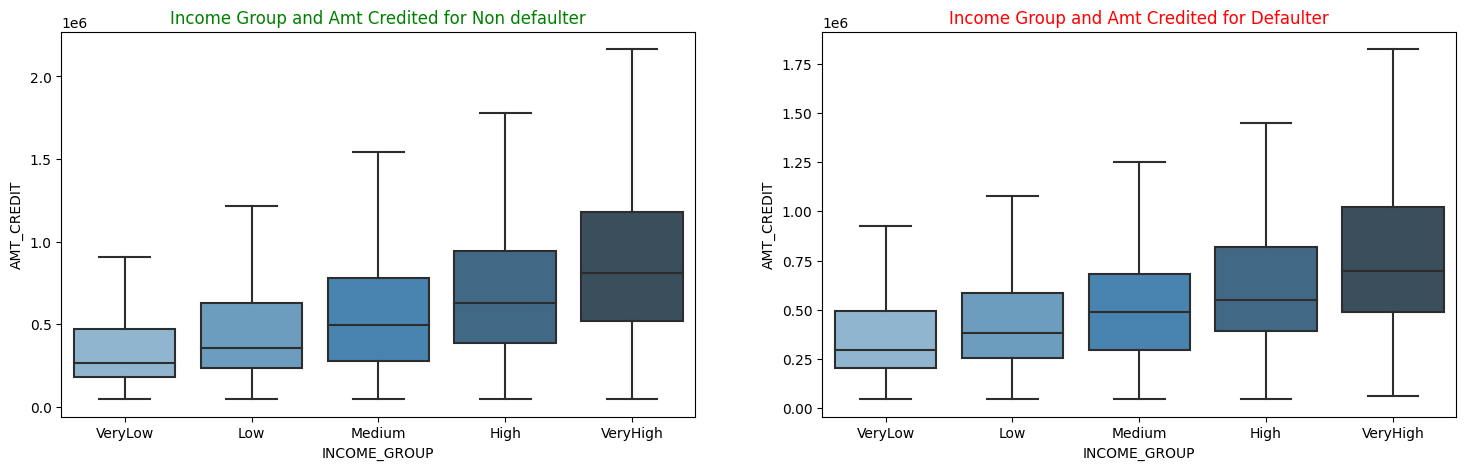

In [408]:
## Checking INCOME_GROUP vs AMT_CREDIT for both data frames

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Non defaulter",color='green')
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =Non_Defaulter_df , showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Defaulter",color='red')
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = Defaulter_df  , showfliers=False, palette="Blues_d");




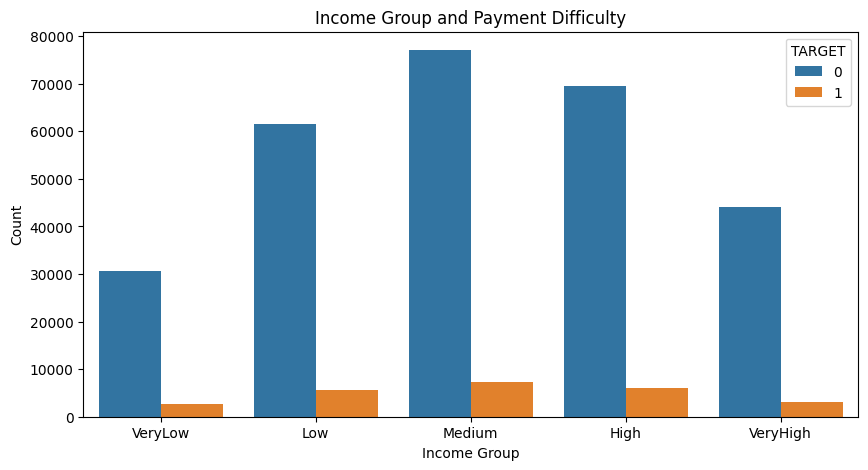

In [409]:
#Checking the same columns to see the affect of Very High Income group
plt.figure(figsize=(10, 5))

ax = sns.countplot(data=application_data_df,x='INCOME_GROUP', hue='TARGET')
ax.set_title('Income Group and Payment Difficulty')
ax.set_xlabel('Income Group')
ax.set_ylabel('Count')

plt.show()



**Key observations**:

Based on the data, It's widely believed that a financial institution gives the most number of loans to the Medium-income group. The High-income group, on the other hand, has the highest default rate. 
This can have an impact on the loan book of the institution as a significant portion of the money may not be paid back.

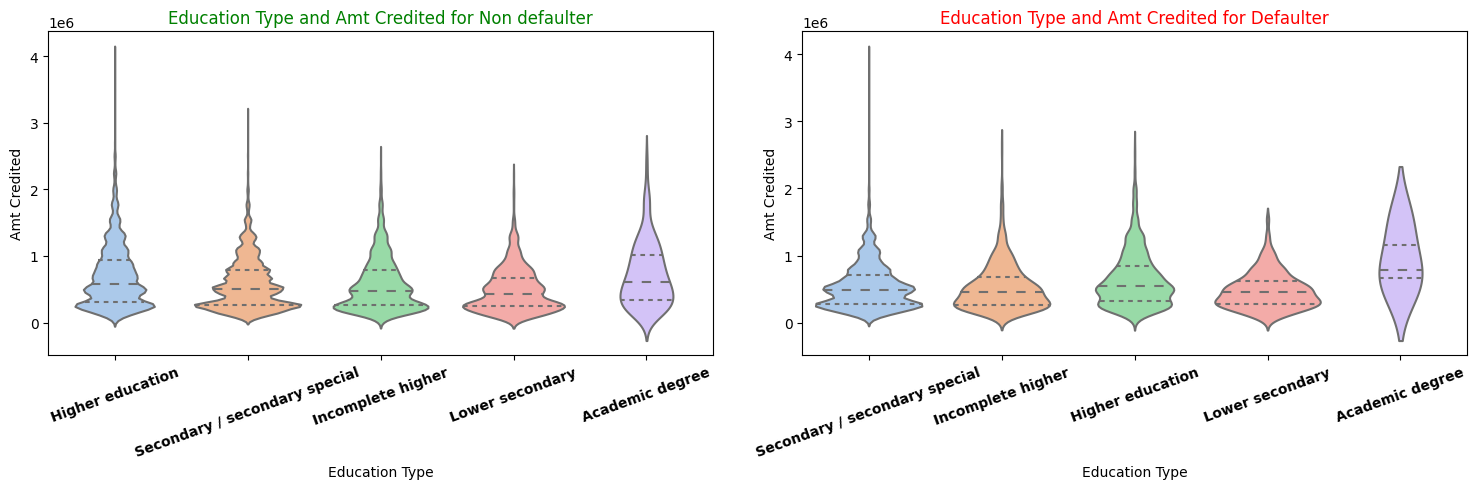

In [413]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.violinplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', data=Non_Defaulter_df  , inner='quartile', palette='pastel')
plt.title('Education Type and Amt Credited for Non defaulter',color='green')
plt.xlabel('Education Type')
plt.ylabel('Amt Credited')
plt.xticks(rotation=20, fontsize=10, fontweight='bold')

plt.subplot(1, 2, 2)
sns.violinplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', data=Defaulter_df , inner='quartile', palette='pastel')
plt.title('Education Type and Amt Credited for Defaulter',color='red')
plt.xlabel('Education Type')
plt.ylabel('Amt Credited')
plt.xticks(rotation=20, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


**Key observations:**

Higher loan values were observed for borrowers with an academic degree, who are also more prone to default. This finding is not conclusive, as the number of individuals with this degree is small, unlike other groups.

#### Bivariate categorical and categorical

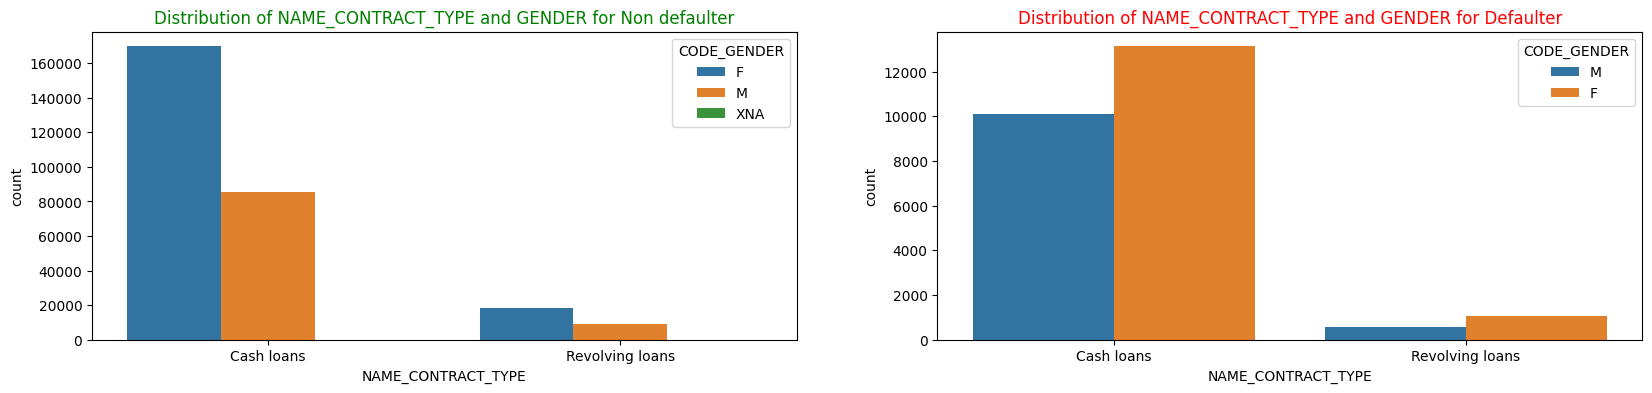

In [416]:
#Bivariate categorical and categorical
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Plot for Non defaulter
axes[0].set_title("Distribution of NAME_CONTRACT_TYPE and GENDER for Non defaulter",color='green')
sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=Non_Defaulter_df , ax=axes[0])

# Plot for Defaulter
axes[1].set_title("Distribution of NAME_CONTRACT_TYPE and GENDER for Defaulter",color='red')
sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=Defaulter_df, ax=axes[1]);




**Key observations**:

This dataset holds a higher number of females as evidenced in the previous study.

Although there were fewer male applicants, the default rate among men was higher than that of women. 

To investigate this trend further, let's look into the data.


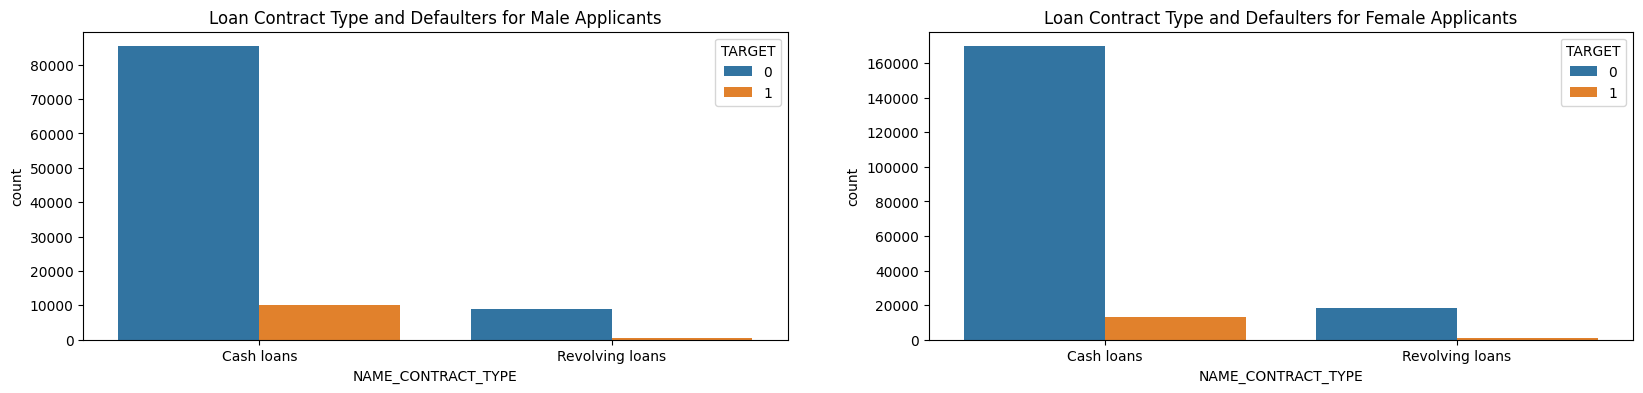

In [417]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=application_data_df [application_data_df ['CODE_GENDER'] == "M"], ax=axes[0])
axes[0].set_title("Loan Contract Type and Defaulters for Male Applicants")

sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=application_data_df [application_data_df ['CODE_GENDER'] == "F"], ax=axes[1])
axes[1].set_title("Loan Contract Type and Defaulters for Female Applicants");



**Key observations:**

1. As noted above data has more females as loan applicant.
1. Default rates are higher among male applicants compared to female applicants.

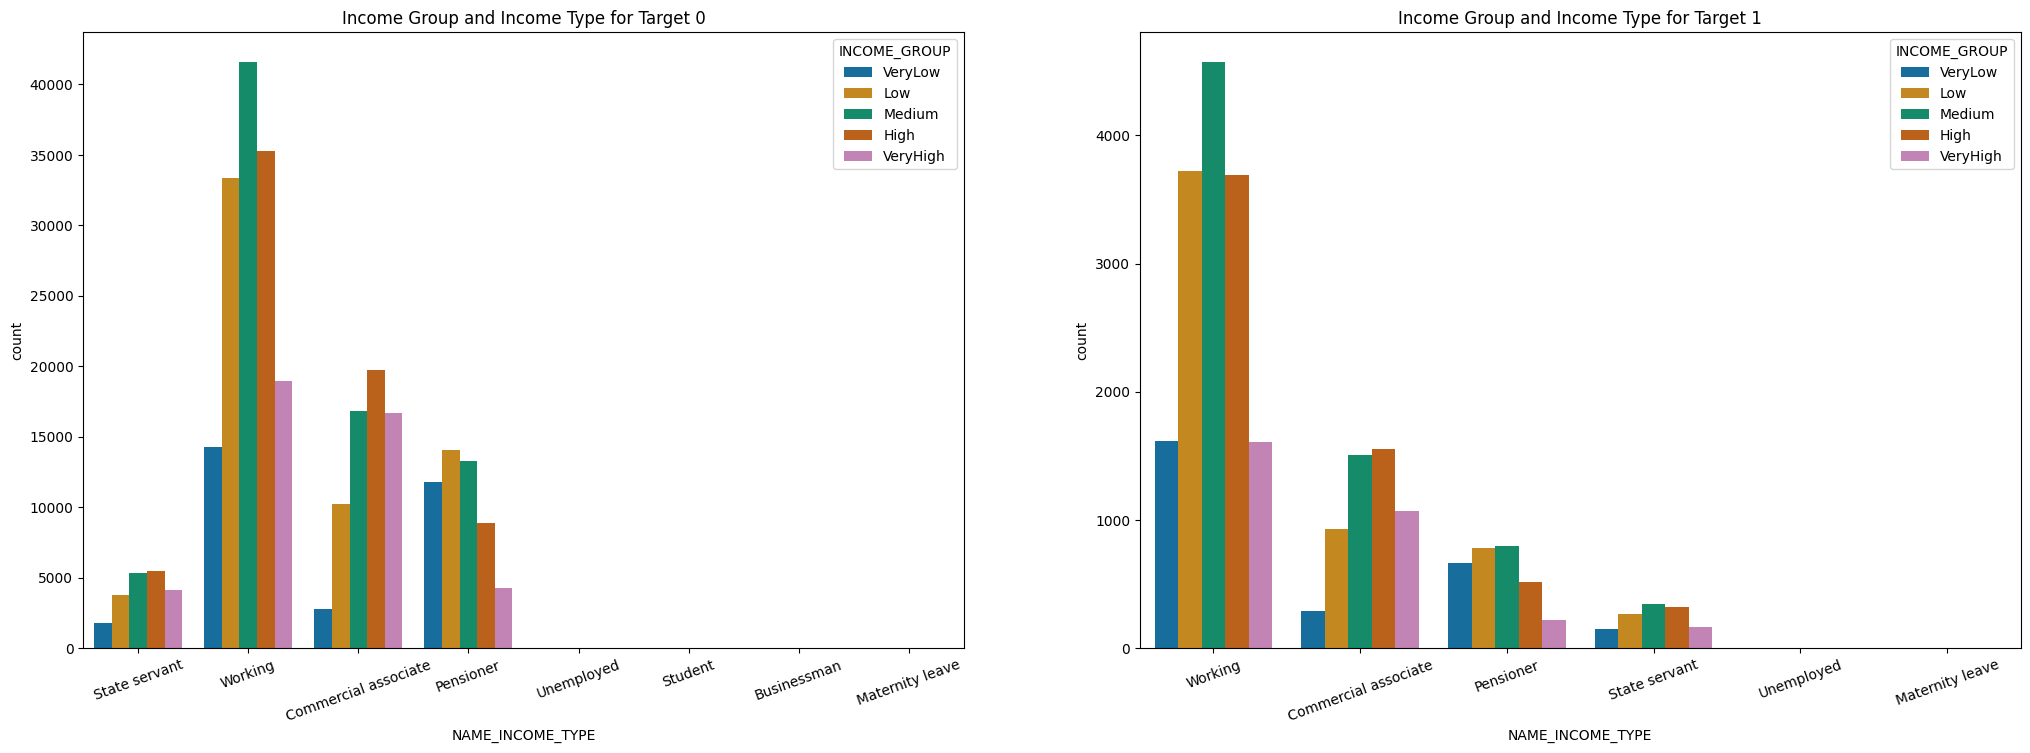

In [420]:
plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)
plt.title("Income Group and Income Type for Target 0")
sns.countplot(x='NAME_INCOME_TYPE', hue='INCOME_GROUP', data=Non_Defaulter_df, palette="colorblind")
plt.xticks(rotation=20, fontsize=10, fontweight=2)

plt.subplot(1, 2, 2)
plt.title("Income Group and Income Type for Target 1")
sns.countplot(x='NAME_INCOME_TYPE', hue='INCOME_GROUP', data=Defaulter_df      , palette="colorblind")
plt.xticks(rotation=20, fontsize=10, fontweight=2);




**Key points:**

The medium income group with a specific income type has a default rate of almost 1 in 12, which is higher than the average default rate of 1 in 11.

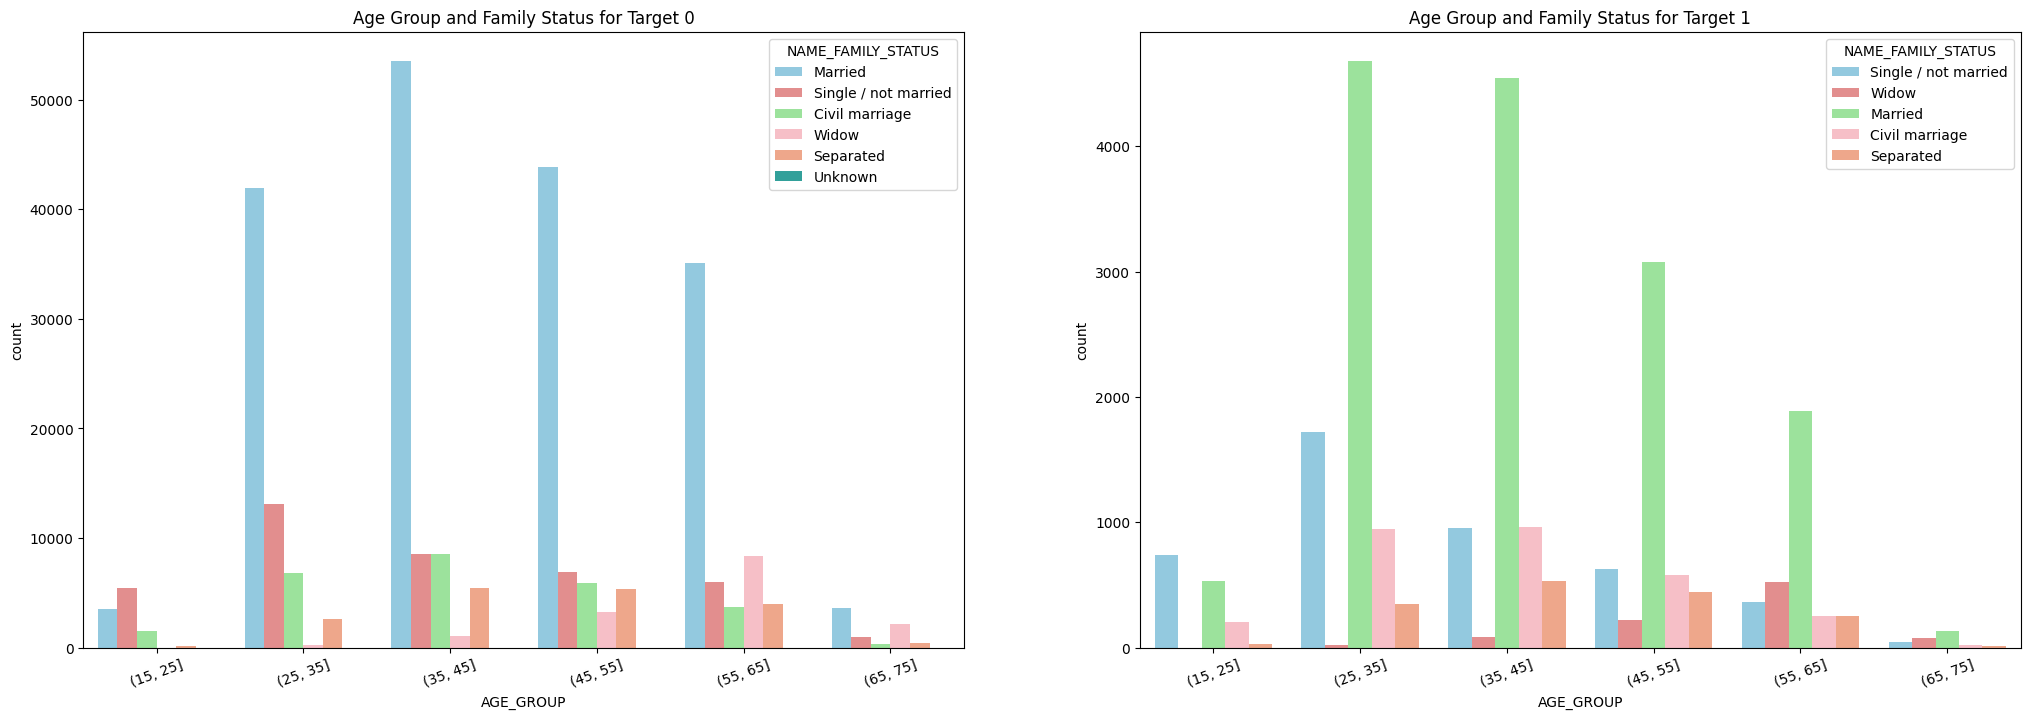

In [423]:
colors = ["skyblue", "lightcoral", "lightgreen", "lightpink", "lightsalmon", "lightseagreen", "lightsteelblue"]

plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)
plt.title("Age Group and Family Status for Target 0")
sns.countplot(x='AGE_GROUP', hue='NAME_FAMILY_STATUS', data=Non_Defaulter_df, palette=colors)
plt.xticks(rotation=20, fontsize=10, fontweight=2)

plt.subplot(1, 2, 2)
plt.title("Age Group and Family Status for Target 1")
sns.countplot(x='AGE_GROUP', hue='NAME_FAMILY_STATUS', data=Defaulter_df, palette=colors)
plt.xticks(rotation=20, fontsize=10, fontweight=2);



**Key Observations:**

- The largest group of applicants facing payment difficulties falls under the age groups of 25-35 and 35-45.
- Within these age groups, married applicants are more likely to face payment difficulties.

# Exploratory Data Analysis of Previous Application Data
## Data Loading and Inspection

In [424]:
# Reading the csv file 'previous_application.csv' using 'read_csv'
prev_aplication_df=pd.read_csv('/Users/uttam/Downloads/previous_application.csv')

prev_aplication_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [425]:
prev_aplication_df.shape

(1670214, 37)

In [426]:
prev_aplication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [427]:
prev_aplication_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

## Data Cleaning
### Missing Values

In [428]:
# Checking columns with  missing values

prev_aplication_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [431]:
# Checking percentage of missing values

prev_aplication_df.isnull().sum()/len(prev_aplication_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

### Handling Missing Values

In [432]:
prev_aplication_df = prev_aplication_df.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_aplication_df = prev_aplication_df.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
prev_aplication_df.isnull().sum()/len(prev_aplication_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [433]:
#Checking the name of columns with >20% NULL values

print(prev_aplication_df.columns[(prev_aplication_df.isnull().sum() * 100 / prev_aplication_df.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [434]:
#Dropping all >20 null value columns
dropping_col=prev_aplication_df.columns[(prev_aplication_df.isnull().sum() * 100 / prev_aplication_df.shape[0]) > 20]
prev_aplication_df.drop(axis=1, columns=dropping_col, inplace=True)
prev_aplication_df.shape

(1246320, 26)

In [436]:
# Deleting columns mentioned above
dropping_col=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
prev_aplication_df.drop(axis=1, columns=dropping_col, inplace=True)
prev_aplication_df.shape

(1246320, 20)

## Univariate Analysis
### Categorical Nominal

NAME_CONTRACT_TYPE
Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: proportion, dtype: float64


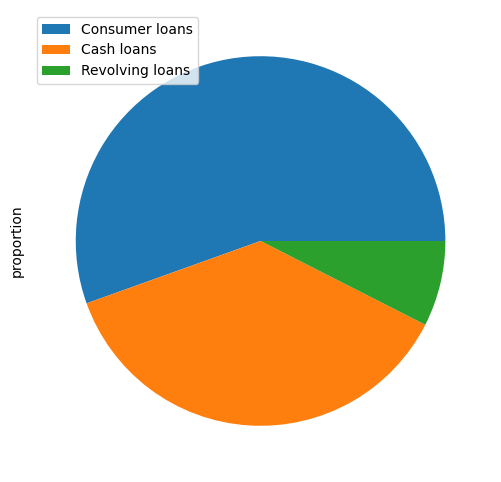



FLAG_LAST_APPL_PER_CONTRACT
Y    0.997222
N    0.002778
Name: proportion, dtype: float64


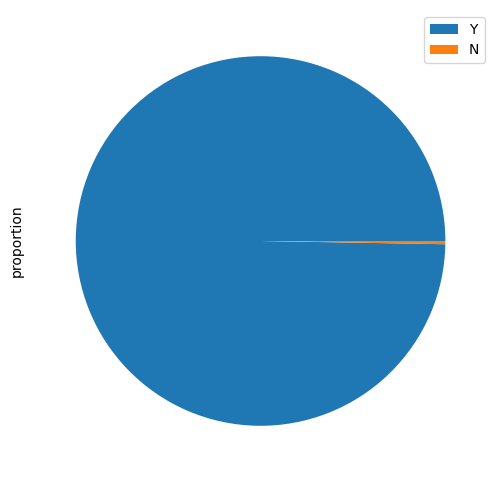



NAME_CONTRACT_STATUS
Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: proportion, dtype: float64


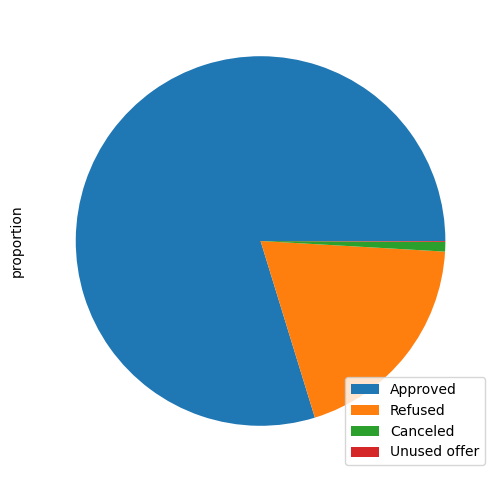



NAME_CLIENT_TYPE
Repeater     0.677066
New          0.236334
Refreshed    0.085877
XNA          0.000723
Name: proportion, dtype: float64


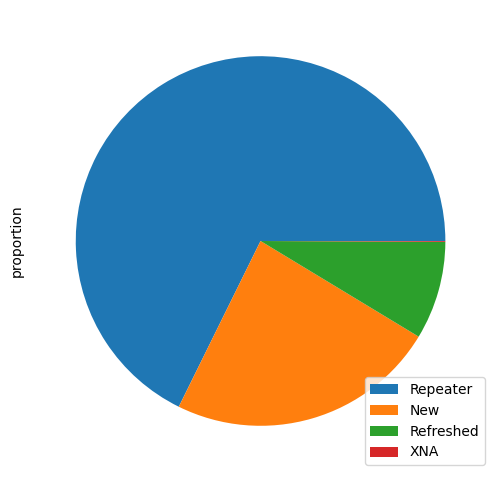



NAME_PORTFOLIO
POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: proportion, dtype: float64


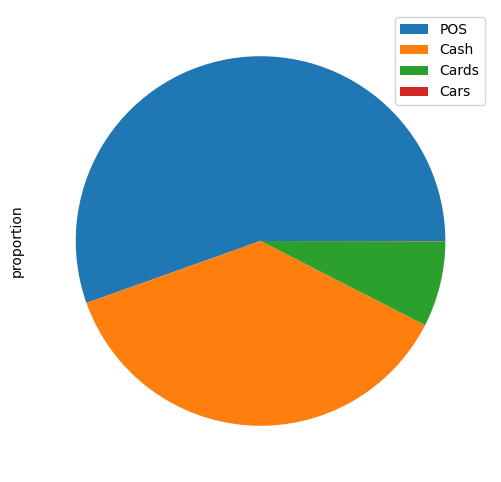



CHANNEL_TYPE
Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: proportion, dtype: float64


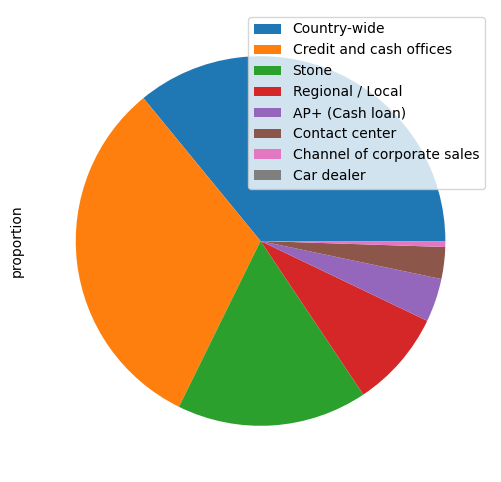



NAME_SELLER_INDUSTRY
XNA                     0.389958
Consumer electronics    0.308245
Connectivity            0.190554
Furniture               0.045780
Construction            0.023736
Clothing                0.019091
Industry                0.015262
Auto technology         0.003989
Jewelry                 0.002173
MLM partners            0.000800
Tourism                 0.000412
Name: proportion, dtype: float64


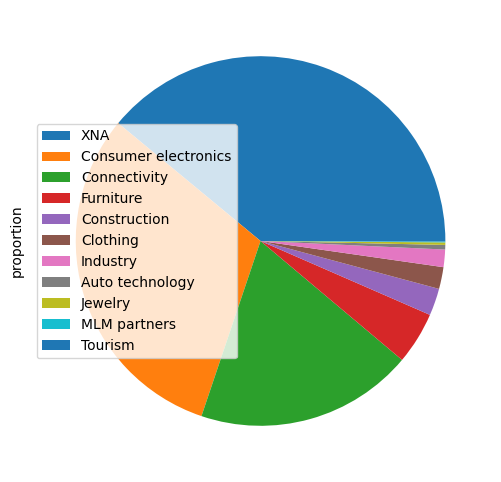



NAME_YIELD_GROUP
middle        0.309335
high          0.283497
low_normal    0.258437
XNA           0.074880
low_action    0.073850
Name: proportion, dtype: float64


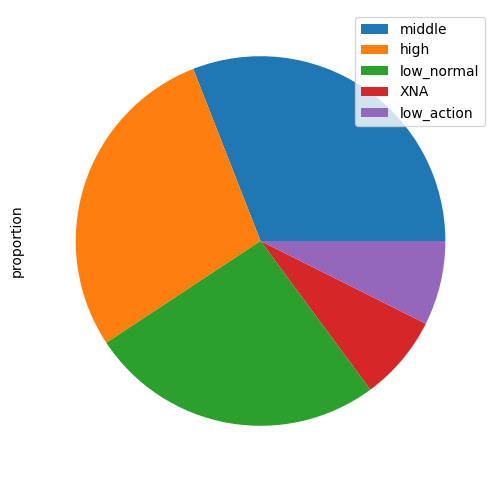



PRODUCT_COMBINATION
POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: proportion, dtype: float64


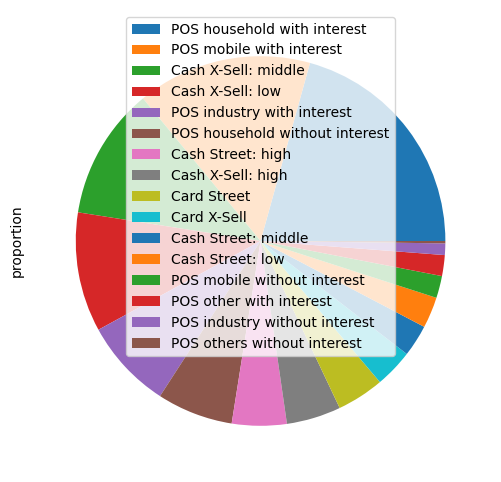

In [437]:
#Checking all object types Variables and their values
for i in prev_aplication_df.columns:
    if prev_aplication_df[i].dtypes=="object":
        print(prev_aplication_df[i].value_counts(normalize=True, dropna= False))
        
        plt.figure(figsize=[6,6])
        prev_aplication_df[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        print("\n")
        

**Key Observations:**

The dataset contains a consumer loan that was not included in the application dataframe. Around 43 percent of all loans are made up of consumer loans, while cash loans make up 44%. Revolving loans contribute to the remaining portion.

Out of the total loans, around 79% have been approved. On the other hand, some loans have been refused, left unused, or canceled. This indicates that there is an imbalance in the data.

Out of the total applicants, around 67% are repeaters. The "NAME_CLIENT_TYPE" column has some null values.

Over half of the applicants took out loans for purchases using a POS device.

The "NAME-SELLER-INDUSTRY" column has a total of 37% XNA values. 

The highest value category is consumer electronics, with 30% of the total.


### Numerical Variable

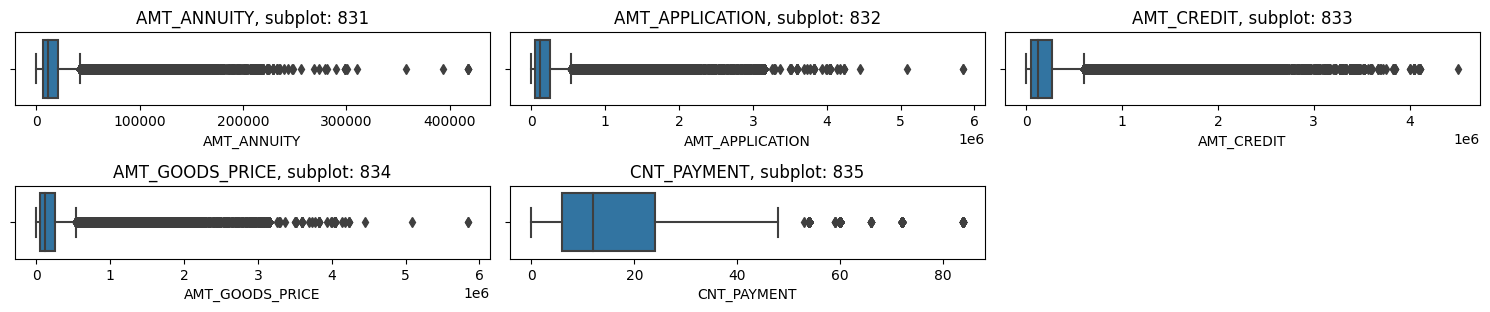

In [439]:
# Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 12))

for i in prev_aplication_df.columns:
    if prev_aplication_df[i].dtypes == "float64" or prev_aplication_df[i].dtypes == "float32":
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)  # Set the x-axis label
        sns.boxplot(x=prev_aplication_df[i], orient='v')  
        c = c + 1

fig.tight_layout()
plt.show()



**Observation:**

Continuous variables appear to have a high percentage of outliers. Let's visualize their distributions to get a better understanding.

## Bivariate Analysis
### Categorical Variable

In [440]:
#checking the dataframe 
prev_aplication_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0     17145.0          17145.0                       15   
1    679671.0         607500.0                       11   
2    136444.5         112500.0                       11   
3    470790.0         450000.0                        7   
4    404055.0         337500.0                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  \
0            -73         Repeater            POS             Country-wide   
1           -164         Repeater           Cash           Contact center   
2           -301         Repeater           Cash  Credit and cash offices   
3           -512         Repeater           Cash  Credit and cash offices   
4           -781         Repeater           Cash  Credit and cash offices   

   SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0                35         Connectivity         12.0           middle   
1                -1                  XNA         36.0       low_action   
2                -1                  XNA         12.0             high   
3                -1                  XNA         12.0           middle   
4                -1                  XNA         24.0             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

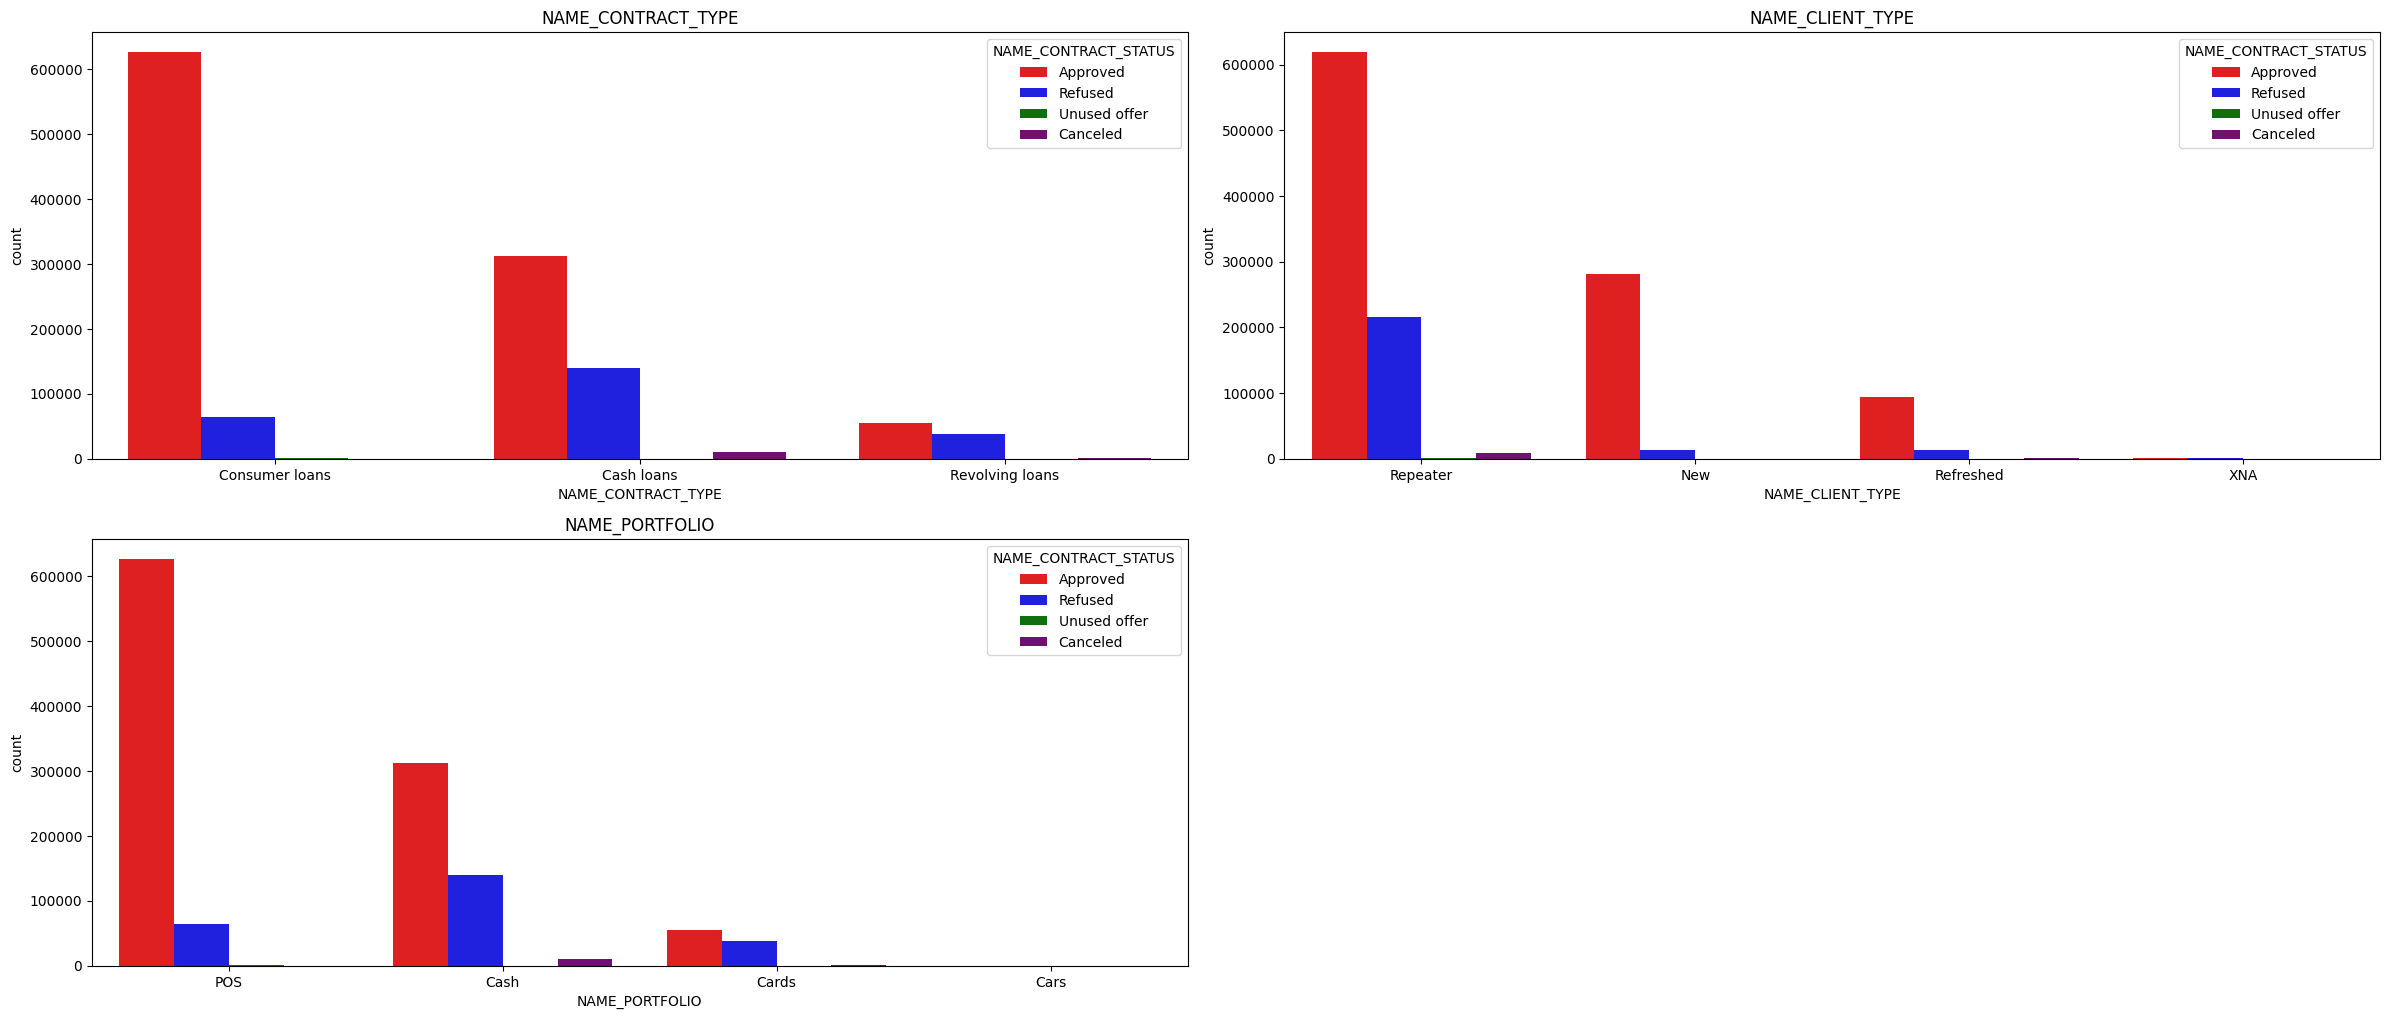

In [447]:
import random

columns = ['NAME_CONTRACT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO']

a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(24, 20))
colors = ['red', 'blue', 'green', 'purple','orange','black','yellow']


for i in columns:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=prev_aplication_df, hue='NAME_CONTRACT_STATUS', palette=colors)
    c = c + 1

fig.tight_layout();







**Key observation:**

The number of people applying for consumer loans is higher than for cash loans. In contrast, cash loans do not have canceled loans as frequently as consumer loans. Also, the bank has a higher number of repeaters in each category, such as refused, canceled, and approved.

POS transactions are mainly consumer loans, and cash advances have been rejected more often than those made using a POS device.


<Figure size 2000x800 with 0 Axes>

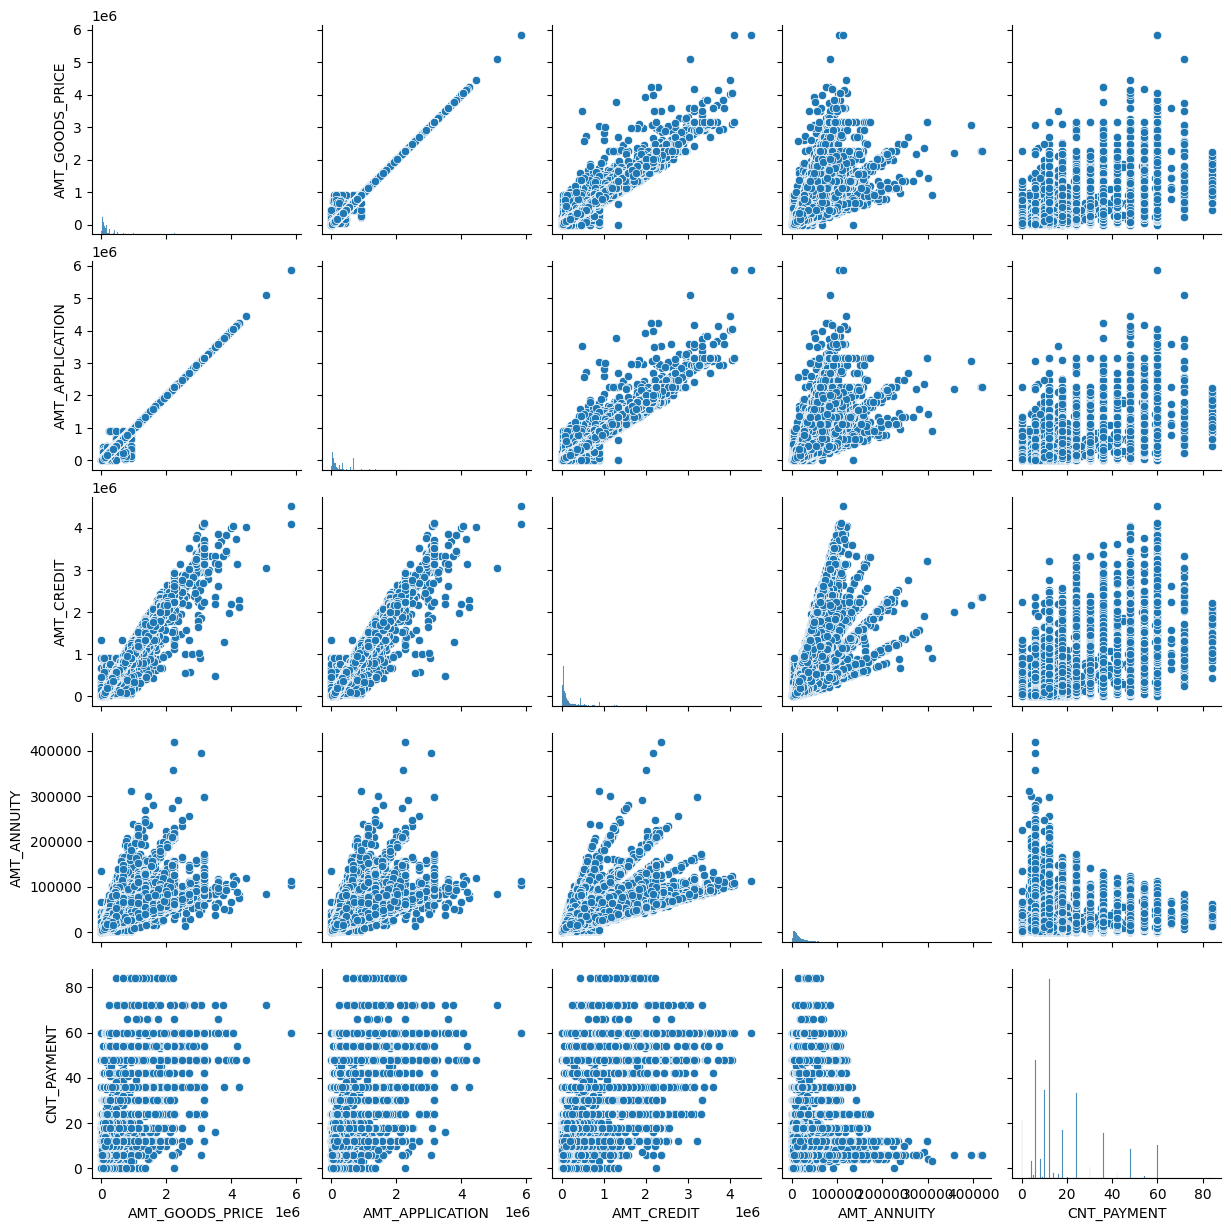

In [448]:
plt.figure(figsize=[20,8])
sns.pairplot(prev_aplication_df[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show() 

**Key Obervations based on the correlation analysis:**

The various loan categories, such as AMT_ANNUITY, AMT_GOODS, and AMT_APPLICATION, exhibit a positive correlation. This is because higher prices of goods require larger loan amounts, and monthly payments. It's logical to expect that these variables would also positively correlate.

There's a strong correlation between the AMT_PRICE and AMT_CREDIT values. This suggests that the value of the products an individual is planning on purchasing directly correlates with the loan amount.

It is surprising, then, that there is a non-significant relationship between AMT_CREDIT and CNT_PAYMENTS. It was initially believed that as the loan term lengthens, the number of monthly payments would increase. However, this finding suggests that other factors may be affecting the payment terms.

The results of this analysis provide us with valuable information on the link between these variables and how they affect loan applications.


## Multivariate Analysis

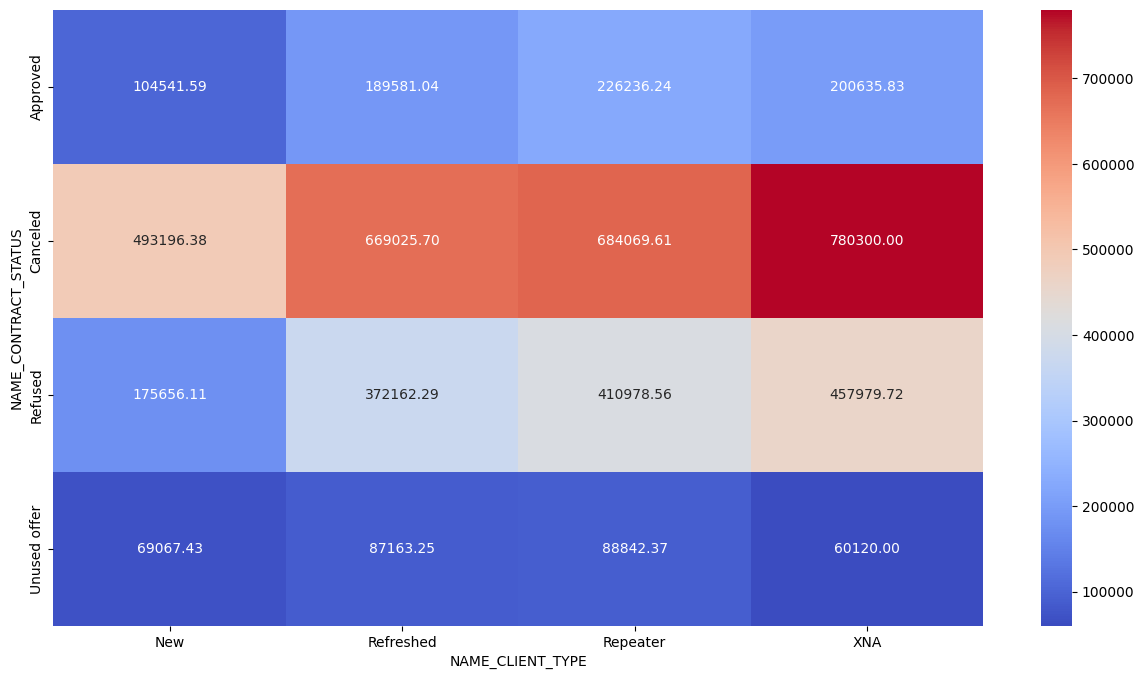

In [449]:
# Checking contract status vs name client type aggregating over application amount

import numpy as np

res = pd.pivot_table(data=prev_aplication_df , index="NAME_CONTRACT_STATUS", columns='NAME_CLIENT_TYPE', values='AMT_APPLICATION')
plt.figure(figsize=(15, 8))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(res, annot=True, cmap=cmap, fmt=".2f");


**Key points:**

The low number of offer applications is a sign that many consumers are taking advantage of the loans that were offered.

The number of loan applications that have been canceled is high. This could be a result of the bank refusing the loans due to the borrower's high debt-to-liability ratio.

The number of repeat customers who applied for a loan was higher than those who took out a new one. This suggests that the bank has a better policy or incentive program for these consumers, which encourages them to take out larger loans.


# Merged Data frames Analysis

In [451]:
merged_df=pd.merge(application_data_df,prev_aplication_df , how='left', on="SK_ID_CURR")
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE  ... NAME_CONTRACT_STATUS DAYS_DECISION NAME_CLIENT_TYPE  \
0   Unaccompanied  ...             Approved        -606.0              New   
1          Family  ...             Approved        -746.0         Repeater   
2          Family  ...             Approved        -828.0        Refreshed   
3          Family  ...             Approved       -2341.0        Refreshed   
4   Unaccompanied  ...             Approved        -815.0              New   

  NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  \
0            POS                    Stone             500.0   
1           Cash  Credit and cash offices              -1.0   
2            POS                    Stone            1400.0   
3            POS             Country-wide             200.0   
4            POS         Regional / Local              30.0   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0       Auto technology         24.0        low_normal   
1                   XNA         12.0        low_normal   
2             Furniture          6.0            middle   
3  Consumer electronics         12.0            middle   
4          Connectivity          4.0            middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 66 columns]

In [452]:
merged_df.shape

(1078854, 66)

In [453]:
# Plotting Name contract status to check percentage of default status.

contract=merged_df['NAME_CONTRACT_STATUS'].unique()
contract

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

Target 0 and 1 for: Approved


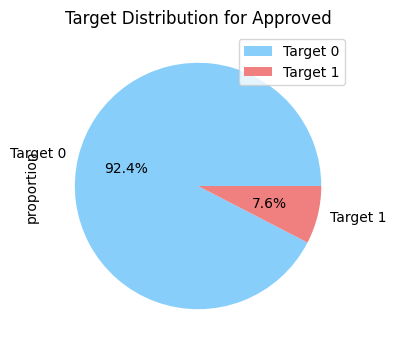

Target 0 and 1 for: Refused


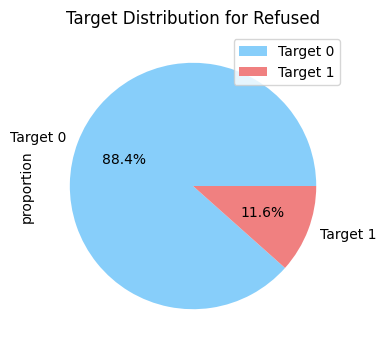

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Target 0 and 1 for: nan


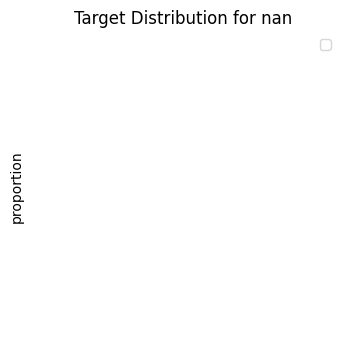

Target 0 and 1 for: Canceled


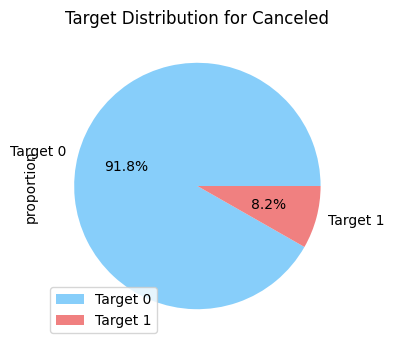

Target 0 and 1 for: Unused offer


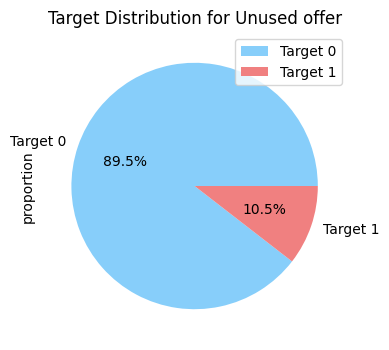

In [454]:
colors = ['lightskyblue', 'lightcoral']

for i in contract:
    print("Target 0 and 1 for:", i)
    plt.figure(figsize=[6, 4])
    target_counts = merged_df [merged_df ['NAME_CONTRACT_STATUS'] == i]['TARGET'].value_counts(normalize=True)
    target_counts.plot.pie(normalize=True, colors=colors, autopct='%1.1f%%', labels=['Target 0', 'Target 1'])
    plt.legend()
    plt.title(f"Target Distribution for {i}")
    plt.show()


***Key Observations:**

Out of the loans that were approved, around 7.6% have resulted in default. This is a concerning figure.

The presence of past-due loans in the background of new applications is alarming. It suggests that the bank's approval decisions may be leading to defaults.


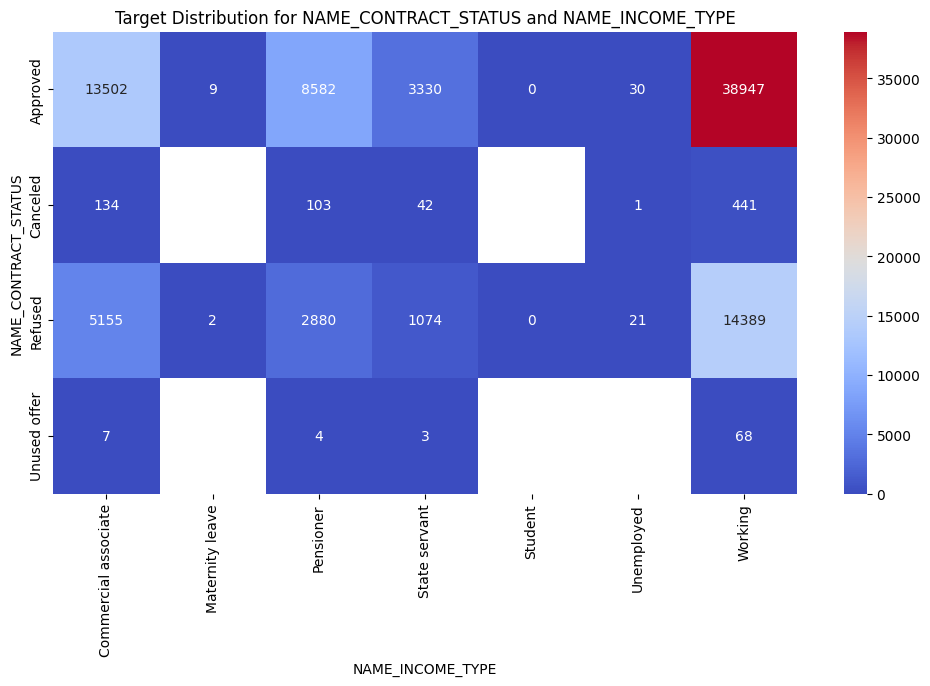

In [455]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

colors = sns.color_palette('coolwarm', as_cmap=True)

# Create the pivot table
res = pd.pivot_table(data=merged_df , index="NAME_CONTRACT_STATUS", columns="NAME_INCOME_TYPE", values='TARGET', aggfunc="sum")

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(res, annot=True, cmap=colors, fmt="g")
plt.title("Target Distribution for NAME_CONTRACT_STATUS and NAME_INCOME_TYPE");


**Key point based on the heatmap:**

The values in the matrix above suggest a strong relationship between the number of defaults and the working income type of the applicant. For instance, people with an "Approved" contract status experienced higher default rates.

It's concerning to see that people who previously applied for a loan with the notations "Refused," "Cancelled," or "Unused" are experiencing default. This indicates that even though the financial institution rejected or canceled the previous application, it still approved the current one.

Among the borrowers whose previous applications were rejected, over 14,000 were working-income individuals who subsequently defaulted. This suggests that they have a credit risk.

By reviewing the heatmap, we may be able to identify possible risk factors related to the default behavior of borrowers.


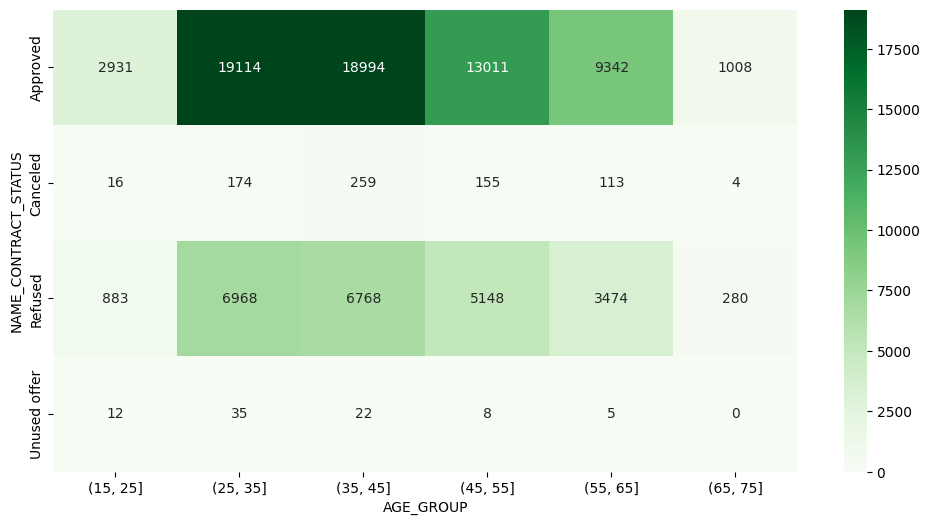

In [456]:
# Checking "NAME_CONTRACT_STATUS", "AGE_GROUP", aggregating on Target
res = pd.pivot_table(data=merged_df , index="NAME_CONTRACT_STATUS", columns="AGE_GROUP", values='TARGET', aggfunc="sum")

plt.figure(figsize=(12, 6))
sns.heatmap(res, annot=True, cmap='Greens', fmt="g"); 


**Few key points:**

Values in the matrix above indicate a strong correlation with the number of cases that have resulted in default, which is Target 1.

The default rates among individuals aged 25 to 35 and those aged 35 to 45 with approved loans were higher. This suggests a concerning trend.

Individuals who had previously applied with the notations “Refused,” “Cancelled,” or “Unused” have defaulted on their current loans, which suggests that the financial institution might have a risk with these types of applicants.

The heatmap offers valuable information on the correlation between the target variable "TARGET" and the various attributes of applicants, allowing us to identify distinct patterns of default.


                             **Identify distinct patterns of default.**

The data collected from the heatmap revealed that there were distinct patterns of default in the approved applications.

Several factors were identified as possible risk factors that could lead to a borrower's default. These variables were then cross-referenced with the default cases and approved applications to confirm the findings. It was found that the high rate of defaults among the approved applications was due to the various factors that affected the applicant's credit history.

Individuals with a medium income level were more prone to experiencing default.

Individuals who are working are more prone to experiencing default.

Business Type 3 applicants are more prone to experiencing delinquency.

About 70% of applicants who don't own their homes are more prone to default.

The results of this study suggest that the various factors that affect an individual's credit risk can be used to predict a borrower's likelihood of experiencing default even after they have been approved.



# Case Summary: 
                       **Defaulters' Demography and Other Important Factors.**

Several demographic elements were identified as possible risks that could lead to borrowers' default. These were then cross-checked against the approved loans to confirm the results. The findings support the initial analysis, and the key demographic factors exhibited a higher likelihood of causing default.

Individuals with medium income levels were more prone to experiencing loan default.

The default rate among individuals aged 25 to 35 and those aged 35 to 45 was higher than that of other age groups.

Male applicants seem to be more prone to experiencing loan defaults. Employment Status: Applicants with no job are more likely to default. Drivers, laborers, and salespeople are also more prone to experiencing trouble. 
Business Type: 3 is known to result in higher default rates.


           **Other important factors to be considered when evaluating loan applications include:**

The lower the number of days that elapsed following the last phone call, the more concerns it raises about applicant stability.

The number of bureau hits in the last month or week is favorable, which indicates that there has been a decrease in credit inquiries.

Income-Goods Price Disparity can affect repayment capacity.

People who have previously applied for a loan with a notation labeled "Refused," "Unused," or "Cancelled" are more likely to default. 

This suggests that financial institutions may have to take a closer look at these types of cases since they are still subject to default risks.

                                  **Credible Applications Refused:**

Unused applications are rejected as they may not meet the sanctioned amount. It is not clear why this happens, though further investigation is necessary.

Women applicants may be given a higher weightage in the assessment procedure as their default rate is lower.
Although 60% of borrowers who have defaulted are working, this doesn't mean that every applicant should be rejected. It's important to scrutinize other factors such as income and credit history before making a final decision.

Some cases where the previous application was rejected or marked as "refused," "unused," or "cancelled" show that the current one has been paid on time. This raises questions about the decision-making process in the past, requiring further investigation.
